# Topic Classification of The New York Times Comments

Maria Annecchione, January 2020

## Contents
 - Project Proposal  
 - Previous Work  
 - Examining the Dataset  
 - Text Pre-processing  
 - Feature Engineering 
    - BOW  
    - TF-IDF  
    - Word2Vec  
    - GloVe  
    - Baseline Model after Feature Engineering  
 - Feature Selection  
    - Univariate feature selection with F-Test for feature scoring
    - Singular Value Decomposition  
    - Extra Trees Classifier  
    - Recursive Feature Elimination (RFE) with Support Vector Machine (SVM)  
    - Baseline Model after Feature Selection  
 - Model Selection and Evaluation  
    - Support Vector Machine
    - Naive Bayes
    - Logistic Regression
    - Random Forest Classifier  
 - Ensemble Methods  
    - bagging  
    - boosting  
    - stacking
 - Neural Networks  
     - Mulitlayer Perceptron  
     - Recurrent Neural Network  
     - Convolutional Neural Network  
 - Model Interpretation
     - LIME
     - SHAP
 - Conclusions
  
  
## Project Proposal

**The New York Times Comments** dataset is on **Kaggle** and can be accessed <a href="https://www.kaggle.com/aashita/nyt-comments" target="_blank">here</a>. Separate csv files for the months January to May of 2017 and 2018 are available for download. Here I have selected the March 2018 csv file for supervised news topic analysis. 

In machine learning applications that are not focused on Natural Language Processing (NLP), we would normally work with all or a subset of attributes in a dataset. However, in NLP applications we select a "wordy" attribute in a dataset, tokenize this attribute, and the tokens become the starting attributes of modelling and prediction. In this dataset the wordy attribute is **commentBody**. It contains reader comments on articles. The articles themselves are not in the dataset. 
 
The topic classification will be based on the reader comments variable: **commentBody**. From the reader comments I will attempt to extract the news topic for the article the comment refers to. Two attributes were identified as potential target attributes. The **sectionName** and **newDesk** attributes were both potential target attributes. I've chosen to base the topic attribute on the **newSection** attribute because its values cover a broader, more descriptive range of news topics than the **newDesk** attribute. 

After examining the dataset, pre-processing the comments, balancing the dataset and refining the target variable I will use supervised machine learning algorithms to predict the news topic of the comment. I will use the algorithms iteratively after feature engineering and feature extraction to help develop a baseline model and then a model for deployment. The models will be selected based on evaluation metrics such as f1-score, precision and recall, and on plots such as learning curves, precision-recall curves, ROC curves and confusion matrix heat maps. I will then try to refine the model by applying the ensemble methods of bagging, boosting and stacking. Finally I will verify if better results can be obtained with neural networks.

What is the motivation for this task? After all we already know the topic of the article. The short answer is: for "enhanced reader experience". Often news articles and, more so the reader comments the articles provoke, delve into multiple topics. Being able to identify these topics provides a basis on which links to related news items can be provided to the reader. 

## Previous Work

Previous work on news topic analysis fall in the two categories of topic modelling and topic classification. The former encompasses unsupervised machine learning methods while the latter encompasses supervised machine learning methods. For example, Llewellyn et al. (2016) use Latent Dirichlet Allocation (LDA) to examine whether topic prediction is improved by clustering on combined comments. The article also references more articles on clustering methods applied to news topic extaction from user generated text. Examples of previous work on topic classification of news text use the 20 Newsgoup data set (<a href="https://towardsdatascience.com/machine-learning-nlp-text-classification-using-scikit-learn-python-and-nltk-c52b92a7c73a" target="_blank">see this</a>). In fact the dataset is included in the Scikit-learn datasets package. In this project I will focus on supervised methods, hence topic classification.


## Examining the Dataset

Below, I've loaded The New York Times March 2018 Comments dataset. The dataframe has 246 946 documents with 33 attributes.

The attributes **recommendedFlag**, **reportAbuseFlag**, **userTitle**, **userURL** have almost all NaN value. These attributes are not needed in this NLP project, so they can be ignored.

The attributes **parentUserDisplayName** and **sectionName** have NaN in more than half the comments. I'll need **sectionName** to create the target variable, but **parentUserDisplayName** is not needed in this NLP project. If I drop the rows that have NaN in the **sectionName** attribute I still have a big data set to work with. So I'll go ahead and drop those comments.

There are a few comments with NaN in the **commentTitle**, **userDisplayName** and **userLocation** attributes. Again, these attributes are not needed here, so it is not necessary to impute these NaN values.

In [51]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

import pandas as pd

df = pd.read_csv('NYTCommentsMarch2018.csv',low_memory=False)
df.head()

,approveDate,articleID,articleWordCount,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,...,sharing,status,timespeople,trusted,updateDate,userDisplayName,userID,userLocation,userTitle,userURL
0,1520043821,5a974697410cf7000162e8a4,1207,If the choice is between mining for bitcoin - ...,26188943.0,26188943.0,<br/>,comment,1520029445,1.0,...,1,approved,1,0,1520043821,Steve,46903103.0,Florida,NaN,NaN
1,1520043790,5a974697410cf7000162e8a4,1207,"<br/>To me, Bitcoin (et al) appears to be an e...",26189292.0,26189292.0,<br/>,comment,1520031265,1.0,...,0,approved,1,0,1520043790,MyOpinion,82778.0,NYC,NaN,NaN
2,1520043789,5a974697410cf7000162e8a4,1207,Bitcoin is a pyramid scheme backed by nothing ...,26189645.0,26189645.0,<br/>,comment,1520033172,1.0,...,0,approved,1,0,1520043789,Bert Gold,3013548.0,"Frederick, Maryland",NaN,NaN
3,1520043788,5a974697410cf7000162e8a4,1207,What does it cost in energy to dig up and refi...,26189102.0,26189102.0,<br/>,comment,1520030291,1.0,...,0,approved,1,0,1520043788,James Demers,70245222.0,Brooklyn,NaN,NaN
4,1520043787,5a974697410cf7000162e8a4,1207,You forgot to mention stock buybacks.,26189683.0,26189683.0,<br/>,comment,1520033404,1.0,...,0,approved,1,0,1520043787,Bill,66424344.0,California,NaN,NaN


In [52]:
print(df.shape)
df.isna().sum()

(246946, 33)


approveDate                   0
articleID                     0
articleWordCount              0
commentBody                   0
commentID                     0
commentSequence               0
commentTitle                 38
commentType                   0
createDate                    0
depth                         0
editorsSelection              0
inReplyTo                     0
newDesk                       0
parentID                      0
parentUserDisplayName    193987
permID                        2
picURL                        0
printPage                     0
recommendations               0
recommendedFlag          246946
replyCount                    0
reportAbuseFlag          246946
sectionName              149638
sharing                       0
status                        0
timespeople                   0
trusted                       0
updateDate                    0
userDisplayName              91
userID                        0
userLocation                 47
userTitl

In [53]:
df = df.dropna(subset = ['sectionName']) 
print(df.shape)
df.isna().sum()

(97308, 33)


approveDate                  0
articleID                    0
articleWordCount             0
commentBody                  0
commentID                    0
commentSequence              0
commentTitle                19
commentType                  0
createDate                   0
depth                        0
editorsSelection             0
inReplyTo                    0
newDesk                      0
parentID                     0
parentUserDisplayName    76340
permID                       0
picURL                       0
printPage                    0
recommendations              0
recommendedFlag          97308
replyCount                   0
reportAbuseFlag          97308
sectionName                  0
sharing                      0
status                       0
timespeople                  0
trusted                      0
updateDate                   0
userDisplayName             44
userID                       0
userLocation                13
userTitle                97307
userURL 

In [54]:
df.commentBody.describe()

count     97308
unique    97179
top       Amen!
freq          5
Name: commentBody, dtype: object

In [55]:
df.newDesk.describe()

count          97308
unique            20
top       Washington
freq           49247
Name: newDesk, dtype: object

In [56]:
df.sectionName.describe()

count        97308
unique          37
top       Politics
freq         52798
Name: sectionName, dtype: object

After dropping the comments containing NaN **sectionName**, we have 97308 articles to work with. There are 97179 unique comments. The most frequent comment is "Amen!" and it occurs 5 times. There are 20 unique **newDesk** values and the most frequent is 'Washington' which occurs 49247 times. There are 37 unique **sectionName** values and the most frequent is 'Politics' which occurs 52798 times.

I can proceed with cleaning the comments attribute **commentBody** and refining the target attribute **topic** (not yet created).

## Text Pre-processing

Before proceeding with cleaning the comments and tokenizing, I'll give some consideration to the target variable in this NLP problem. I want to derive the category that the news item belongs to from the words in the comment. 

Below I've plotted the distrubtuion of values for the two potential target attributes. The **newSection** attribute values cover a richer, more decriptive range of news topics than the **newDesk** attribute. So I will base the target topic attribute on the **newSection** attribute.

There are 37 topics in this attribute and the distribution of topics is very imbalanced. I will group similar topics together under new headings.

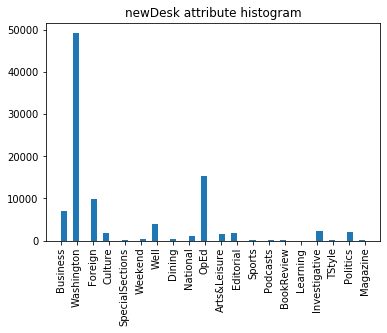

In [57]:
import matplotlib.pyplot as plt

plt.hist(df['newDesk'],bins=50)
plt.xticks(rotation=90);
plt.title('newDesk attribute histogram');

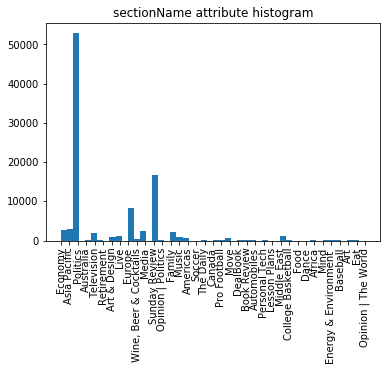

In [58]:
plt.hist(df['sectionName'],bins=50)
plt.xticks(rotation=90);
plt.title('sectionName attribute histogram');

               0
count      97308
unique         6
top     Politics
freq       53037


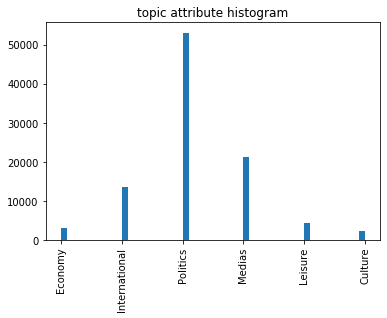

In [59]:
# I'll create the topic attribute from the sectionName attribute;
# merge some sectionName labels

# merge 'Food',Wine, Beer & Cocktails', 'Eat', 'Retirement', 'Live', 'Move', 'Family','Soccer',Pro Football', 'College Basketball', 'Baseball' ----> 'Leisure'
# merge 'Art & Design', 'Art', 'Music', 'Book Review', 'Mind', 'Dance','Lesson Plans' ----> 'Culture'
# merge 'Televsion', 'Media', 'Sunday Review', 'The Daily' ----> 'Medias'
# merge 'Asia Pacific', 'Australia', 'Europe', 'Canada', 'Africa', 'Middle East', 'Americas', 'Opinion | The World'---> 'International'
# merge 'Opinion | Politics', 'Politics' ---> 'Politics'
# merge 'Economy', 'DealBook', 'Automobiles', 'Personal Tech', 'Energy & Environment ' ----> 'Economy'
leisurelist = ['Food','Wine, Beer & Cocktails', 'Eat', 'Retirement', 'Live', 'Move', 'Family', 'Soccer','Pro Football', 'College Basketball', 'Baseball']
culturelist = ['Art & Design', 'Art', 'Music', 'Book Review', 'Mind','Dance','Lesson Plans']
mediaslist = ['Television', 'Media', 'Sunday Review', 'The Daily']
internationallist = ['Asia Pacific', 'Australia', 'Europe', 'Canada', 'Africa', 'Middle East', 'Americas','Opinion | The World']
politicslist = ['Opinion | Politics', 'Politics' ]
economylist = ['Economy', 'DealBook', 'Automobiles', 'Personal Tech', 'Energy & Environment ']
 
topic = []

for word in df.sectionName:
    if word in leisurelist:
        topic.append('Leisure')
    elif word in culturelist:
        topic.append('Culture')
    elif word in mediaslist:
        topic.append('Medias')
    elif word in internationallist:
        topic.append('International')
    elif word in politicslist:
        topic.append('Politics')
    elif word in economylist:
        topic.append('Economy')
    else:
        topic.append(word)

print(pd.DataFrame(topic).describe())

plt.hist(topic,bins=50)
plt.xticks(rotation=90);
plt.title('topic attribute histogram'); 

From the above histogram I now have 6 topics: **Economy**, **International**, **Politics**, **Medias**, **Leisure** and **Culture**. The distribution of topics is still not balanced though. The coding examples for up-, down-, and stratified sampling I've seen until now applied to binomial data, not multinomial, so I'll just do the re-sampling manually. I will randomly sample 7.5% of the **Politics** topic, 20% of the **Medias** topic and 30% of the **International** topic.

       commentBody    topic
count        21844    21844
unique       21832        6
top        Thanks!  Leisure
freq             3     4292


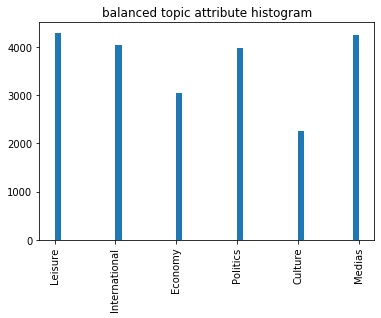

In [60]:
import sklearn

tempdf = pd.DataFrame({'commentBody':df.commentBody,'topic':topic})
politicdf = pd.DataFrame.sample(tempdf.loc[tempdf['topic'] == 'Politics'],frac=0.075)
mediasdf = pd.DataFrame.sample(tempdf.loc[tempdf['topic'] == 'Medias'],frac=0.2)
interdf = pd.DataFrame.sample(tempdf.loc[tempdf['topic'] == 'International'],frac=0.3)
tempdf1 = tempdf.loc[tempdf['topic'] != 'Medias']
tempdf2 = tempdf1.loc[tempdf1['topic'] != 'Politics']
otherdf = tempdf2.loc[tempdf2['topic'] != 'International']

frames = [politicdf, mediasdf,interdf,otherdf]
balanceddf = sklearn.utils.shuffle(pd.concat(frames) , random_state=0)

plt.hist(balanceddf.topic,bins=50)
plt.xticks(rotation=90);
plt.title('balanced topic attribute histogram');

print(balanceddf.describe())

From the description and histogram above, I now have 21844 comments distributed much more evenly across the 6 topics. Let's proceed with cleaning the comments and tokenizing.

The text pre-processing code was copied from <a href="https://github.com/dipanjanS/practical-machine-learning-with-python/blob/master/bonus%20content/nlp%20proven%20approach/NLP%20Strategy%20I%20-%20Processing%20and%20Understanding%20Text.ipynb" target="_blank">here</a>.
It uses the spaCy library and does pretty much all the cleaning. I had to edit it so that it would keep news-topic-relevant tokens like 'U.S.', 'US', 'Trump' and not convert these to non-news-topic-relevant tokens like 'us' and 'trump' after stripping punctuation and lemmatizing.

In [61]:
# assign independent and dependent variables
X = balanceddf.commentBody
y = balanceddf.topic

In [62]:
import spacy
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
from contractions import CONTRACTION_MAP
import unicodedata

#nlp = spacy.load('en', parse = True, tag=True, entity=True)
#nlp_vec = spacy.load('en_vecs', parse = True, tag=True, entity=True)
#nlp = spacy.load('en_core_web_sm', parse = True, tag=True, entity=True)
nlp = spacy.load('en', disable=['tagger', 'parser', 'ner'])             # maria's edit; this keep's uppercase
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
#stopword_list.remove('no')                                             # maria's edit: these negations are 
#stopword_list.remove('not')                                            # really more usefule in sentiment analysis I think

def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text
#strip_html_tags('<html><h2>Some important text</h2></html>')

def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text
#remove_accented_chars('Sómě Áccěntěd těxt')

def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    #expanded_text = re.sub("'", "", expanded_text)
    expanded_text = re.sub("'", " ", expanded_text)                     # maria's edit; replaces apostrophe with a space
    return expanded_text
#expand_contractions("Y'all can't expand contractions I'd think")

def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text
#remove_special_characters("Well this was fun! What do you think? 123#@!", 
                          #remove_digits=True)

def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text
#lemmatize_text("My system keeps crashing! his crashed yesterday, ours crashes daily")

def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text
#simple_stemmer("My system keeps crashing his crashed yesterday, ours crashes daily")

def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text
#remove_stopwords("The, and, if are stopwords, computer is not")

def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, text_stemmer=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
                                                                        # maria's edit: added stemmer T/F
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # expand contractions    
        if contraction_expansion:
            doc = expand_contractions(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        if text_stemmer:
            doc = simple_stemmer(doc)
        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            #special_char_pattern = re.compile(r'([{.(-)!}])')
            special_char_pattern = re.compile(r'([{(--)!}])"^')         # maria's edits: keep the dot, 'U.S.' --> 'US';
            doc = special_char_pattern.sub(" \\1 ", doc)                # extra dash needed to catch '--'
            doc = remove_special_characters(doc, remove_digits=remove_digits)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

In [63]:
normX = normalize_corpus(X,html_stripping=True, contraction_expansion=True,
                     accented_char_removal=False, text_lower_case=False, 
                     text_lemmatization=True,text_stemmer=False, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True)

# save to file
with open('normalized_data.txt', 'w') as f:
    for item in normX:
        f.write("%s\n" % item)
f.close()

In [64]:
import random
for j in range(5):
    i = random.randint(0, 21843) 
    print('\n')
    print('Before pre-processing: ')
    print(X.iloc[i])
    print('\n')
    print('After pre-processing: ')
    print(normX[i])
    print('\n')



Before pre-processing: 
Our beagles tend to howl or wake up barking when things go bump in the night, which can be super annoying at 3am.  However, I have found turning on a fan or a bit of white noise helps them sleep through the night without getting woken (and thereby waking us) when they hear the train or a neighborhood cat. 


After pre-processing: 
beagle tend howl wake bark thing go bump night super annoy However find turn fan bite white noise help sleep night without get wake thereby wake us hear train neighborhood cat




Before pre-processing: 
I can explain. Trump is a Russian agent out to destroy the US. Our population is a basket of deplorables as Clinton once remarked.


After pre-processing: 
explain Trump Russian agent destroy US population basket deplorables Clinton remark




Before pre-processing: 
Alabama has a $2 billion steel mill in Calvert, jointly owned by Japanese and German steel companies, that imports steel from Mexico and Brazil where it is fabricated fo

Before I move on to tokenizing and feature engineering, I'll check the normalization results. I've displayed above a random selection of comments before and after pre-processing.  It's looks good but it's not perfect. It can probably be impoved by removing remaining weird strings that likely occur only once. Also, I'll check and remove empty comments.

In [65]:
# find all empty processed comments and omit from dataset
nnormX = []
ny = []        
for i in range(len(normX)):
    doc = normX[i]
    if len(doc) == 0 or len(doc) == 1:
        print('There is at least one empty in pre-processed comments... being excluded.')
        print('Original comment: ', X.iloc[i])
    else:
        nnormX.append(doc)
        ny.append(y.iloc[i]) # update topic variable too

There is at least one empty in pre-processed comments... being excluded.
Original comment:  Why not 12?
There is at least one empty in pre-processed comments... being excluded.
Original comment:  25 him. Now.
There is at least one empty in pre-processed comments... being excluded.
Original comment:  What has she done for You?
There is at least one empty in pre-processed comments... being excluded.
Original comment:  No.  Just no.
There is at least one empty in pre-processed comments... being excluded.
Original comment:  Why?
There is at least one empty in pre-processed comments... being excluded.
Original comment:  They are
There is at least one empty in pre-processed comments... being excluded.
Original comment:  Just don't do it. 
There is at least one empty in pre-processed comments... being excluded.
Original comment:  Were you there?
There is at least one empty in pre-processed comments... being excluded.
Original comment:  So am I.
There is at least one empty in pre-processed com

In [66]:
# let's tokenize to count word frequencies
Xprep = []
for doc in nnormX:
    doc = tokenizer.tokenize(doc)
    Xprep.append(doc)
    
from collections import Counter
wordFrequency = Counter()
for doc in Xprep:
    wordFrequency.update(doc)
print('Total number of "words" after pre-processing: {}'.format(len(wordFrequency)))

# Remove rare words, remaining weird strings and mispelled words
# drop "words" that occur once
minimumWordOccurrences = 1
nXprep = [[word for word in doc if wordFrequency[word] > minimumWordOccurrences] for doc in Xprep]

wordFrequency2 = Counter()
for doc in nXprep:
    wordFrequency2.update(doc)
print('Total number of words after excluding "words" that occur once: {}'.format(len(wordFrequency2)))

Total number of "words" after pre-processing: 39505
Total number of words after excluding "words" that occur once: 20238


In [67]:
# top 50 most frequent words
most_occur = wordFrequency2.most_common(50) 
print(most_occur) 

[('much', 8041), ('Trump', 7603), ('would', 4991), ('get', 4233), ('people', 4153), ('one', 3967), ('make', 3924), ('like', 3727), ('good', 3606), ('go', 3568), ('time', 3147), ('think', 3072), ('know', 3006), ('year', 2970), ('say', 2698), ('see', 2543), ('us', 2521), ('need', 2504), ('take', 2493), ('work', 2392), ('many', 2376), ('doe', 2340), ('US', 2309), ('little', 2271), ('want', 2242), ('country', 2158), ('may', 2142), ('way', 2099), ('even', 2071), ('American', 1986), ('use', 1932), ('well', 1888), ('live', 1863), ('world', 1861), ('thing', 1839), ('come', 1773), ('vote', 1643), ('right', 1612), ('give', 1609), ('long', 1592), ('man', 1552), ('day', 1544), ('also', 1506), ('child', 1470), ('Putin', 1438), ('never', 1432), ('find', 1399), ('job', 1368), ('Russia', 1342), ('great', 1312)]


In [69]:
# save to file, clear workspace, then load pre-processed data for feature engineering and selection

# reconstruct tokens
comment = []
for doc in nXprep:
    doc = ' '.join(doc)
    comment.append(doc)

ppdf = pd.DataFrame({'comment':comment,'topic':ny})

ppdf.to_csv('preprocessed_data.csv',index=False,header=True)

We now have ~20300 tokens and the 50 most common are listed above. Many of these are not news relevant; for example, *much*, *would*, *get*, *one*, *good*, *go*. Hopefully the feature selection process below will catch and remove this noise.

## Feature Engineering

Let's start by creating the training and test sets and applying the feature engineering to the two sets. There are a few empty rows that weren't caught in the previous section. I've eliminated those below. Then the cleaned, balanced dataset is split between the training and the test datasets at a ratio of 80%/20%. The training set has 17459 comments. The test set has 4365 comments.

I'll try four feature engineering methods, namely:

- Bag-of-Words including uni- and bi-grams  
- TF-IDF  
- Word2Vec Model  
- GloVe Model

I'l also try two machine learning algorithms to help identify a baseline:

- Logistic regression  
- Support Vector Machine

You'll notice that I'm using the model evalution metrics on the test data, such test accuracy, f1-score, precision, recall and the confusion matrix to help develop a baseline. The computation time was relatively short, a few minutes at most, so I think this was the best approach for identifying which features to use. 

In [1]:
# load pre-processed data that was saved in previous section
from IPython import get_ipython
get_ipython().magic('reset -sf')

import pandas as pd

df = pd.read_csv('preprocessed_data.csv', low_memory=False)
df.head()

,comment,topic
0,sit within meter someone flu make much likely ...,Leisure
1,Pennsylvania sad Republican Trump make announc...,International
2,Mr Darling American agree food industry wish s...,International
3,architect Trump steel aluminum tariff Wilbur R...,Economy
4,hawk get us war child corrupt Administration f...,Politics


In [2]:
# eliminate empty rows that weren't caught in the pre-processing section 
print(df.isna().sum())
df = df.dropna(subset = ['comment']) 
print(df.isna().sum())

comment    10
topic       0
dtype: int64
comment    0
topic      0
dtype: int64


In [3]:
# training/test data split
X = df.comment
y = df.topic

# create training and test sets 
from sklearn.model_selection import train_test_split

# create training and testing vars
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)
print(Xtrain.shape, ytrain.shape)
print(Xtest.shape, ytest.shape)

(17459,) (17459,)
(4365,) (4365,)


In [4]:
# create BOW and TF-IDF features and evaluation

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# build BOW features on train comments, include uni-grams and bi-grams
cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1,2))
cv_Xtrain = cv.fit_transform(Xtrain)
# build TFIDF features on train comments, include uni-grams and bi-grams
tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0, ngram_range=(1,2),
                     sublinear_tf=True)
tv_Xtrain = tv.fit_transform(Xtrain)

# transform test comments into features
cv_Xtest = cv.transform(Xtest)
tv_Xtest = tv.transform(Xtest)

print('BOW model:> Train features shape:', cv_Xtrain.shape, ' Test features shape:', cv_Xtest.shape)
print('TFIDF model:> Train features shape:', tv_Xtrain.shape, ' Test features shape:', tv_Xtest.shape)

BOW model:> Train features shape: (17459, 413662)  Test features shape: (4365, 413662)
TFIDF model:> Train features shape: (17459, 413662)  Test features shape: (4365, 413662)


In [10]:
# logistic regression and support vector machine on BOW and TF-IDF features
# Model Training, Prediction and Performance Evaluation

# define classifiers

from sklearn.linear_model import SGDClassifier, LogisticRegression

lr = LogisticRegression(solver='newton-cg',multi_class='multinomial',penalty='l2', max_iter=100, C=1)
svm = SGDClassifier(loss='hinge', max_iter=200)

### Bag of Words features

The bag of words contains more than 400000 features. The overall and by-class evalution metrics from logistic regression are shown below. The average accuracy is 65%. It looks like many of the **Politics** items are being predicted as **International** or **Medias** topics, and vice versa. Intuitively this makes sense, I think. The **Culture** and **Leisure** classes are predicted most accurately with either precision, recall or f1-score over 75%. This also makes sense, I think, since items in these topics would be devoid of certain politicized terminlogy and would use very different language than the **Politics** or **International** categories. The support vector machine results on the BOW features are similar.

### TF-IDF features

There is an improvement in the evaluation metrics with the TF-IDF features. The average accuracies from logistic regression and support vector machine are 67% and 69%, respectively. Note that the recall for the **Leisure** category has jumped to ~90%. 

### Word2Vec Model

With the Word2Vec model you set the number of features. I've set it to 500. The average accuracy with the support vector machine is ~55% and with the logistic regression, 57%.

### GloVe Model

The number of features in the GloVe model is 384. The accuracies were somewhat less than those obtained with the TD-IDF or BOW features, <50%. Furthermore, the logistic regression did not converge even after trying several different solvers, tolerances, penalties and regularization parameters and increasing the maximum number of iterations.

### Baseline after Feature Engineering

Overall the best modelling and prediction results were obtained with Support Vector Machine using the TF-IDF features. The performance metrics were uniformly higher over all metrics and classes.

In [26]:
# Logistic Regression model on BOW features

import model_evaluation_utils as meu

lr_bow_predictions = meu.train_predict_model(classifier=lr, 
                                             train_features=cv_Xtrain, train_labels=ytrain,
                                             test_features=cv_Xtest, test_labels=ytest)

from simple_colors import *
print(green('Logistic Regression model on BOW features', 'bold'))
meu.display_model_performance_metrics(true_labels=ytest, predicted_labels=lr_bow_predictions,
                                      classes=['Economy', 'International', 'Politics', 'Medias', 'Leisure', 'Culture'])

Logistic Regression model on BOW features
Model Performance metrics:
------------------------------
Accuracy: 0.6609
Precision: 0.664
Recall: 0.6609
F1 Score: 0.6596

Model Classification report:
------------------------------
               precision    recall  f1-score   support

      Economy       0.73      0.67      0.70       587
International       0.64      0.67      0.65       809
     Politics       0.51      0.56      0.54       788
       Medias       0.61      0.54      0.57       857
      Leisure       0.75      0.87      0.81       862
      Culture       0.82      0.65      0.72       462

     accuracy                           0.66      4365
    macro avg       0.68      0.66      0.66      4365
 weighted avg       0.66      0.66      0.66      4365


Prediction Confusion Matrix:
------------------------------
                      Predicted:                                              
                         Economy International Politics Medias Leisure Culture
A

In [27]:
# Logistic Regression model on TF-IDF features
lr_tfidf_predictions = meu.train_predict_model(classifier=lr, 
                                               train_features=tv_Xtrain, train_labels=ytrain,
                                               test_features=tv_Xtest, test_labels=ytest)
print(green('Logistic Regression model on TF-IDF features', 'bold'))
meu.display_model_performance_metrics(true_labels=ytest, predicted_labels=lr_tfidf_predictions,
                                      classes=['Economy', 'International', 'Politics', 'Medias', 'Leisure', 'Culture'])

Logistic Regression model on TF-IDF features
Model Performance metrics:
------------------------------
Accuracy: 0.6669
Precision: 0.6771
Recall: 0.6669
F1 Score: 0.6658

Model Classification report:
------------------------------
               precision    recall  f1-score   support

      Economy       0.74      0.68      0.71       587
International       0.69      0.64      0.67       809
     Politics       0.55      0.56      0.55       788
       Medias       0.55      0.60      0.57       857
      Leisure       0.74      0.90      0.81       862
      Culture       0.91      0.57      0.70       462

     accuracy                           0.67      4365
    macro avg       0.70      0.66      0.67      4365
 weighted avg       0.68      0.67      0.67      4365


Prediction Confusion Matrix:
------------------------------
                      Predicted:                                              
                         Economy International Politics Medias Leisure Cultu

In [28]:
# Support Vector Machine model on BOW features
svm_bow_predictions = meu.train_predict_model(classifier=svm, 
                                             train_features=cv_Xtrain, train_labels=ytrain,
                                             test_features=cv_Xtest, test_labels=ytest)
print(green('Support Vector Machine model on BOW features', 'bold'))
meu.display_model_performance_metrics(true_labels=ytest, predicted_labels=svm_bow_predictions,
                                      classes=['Economy', 'International', 'Politics', 'Medias', 'Leisure', 'Culture'])

Support Vector Machine model on BOW features
Model Performance metrics:
------------------------------
Accuracy: 0.6477
Precision: 0.6527
Recall: 0.6477
F1 Score: 0.6475

Model Classification report:
------------------------------
               precision    recall  f1-score   support

      Economy       0.72      0.66      0.69       587
International       0.62      0.66      0.64       809
     Politics       0.48      0.54      0.51       788
       Medias       0.61      0.54      0.57       857
      Leisure       0.76      0.84      0.80       862
      Culture       0.80      0.62      0.70       462

     accuracy                           0.65      4365
    macro avg       0.66      0.65      0.65      4365
 weighted avg       0.65      0.65      0.65      4365


Prediction Confusion Matrix:
------------------------------
                      Predicted:                                              
                         Economy International Politics Medias Leisure Cultu

In [29]:
# Support Vector Machine model on TF-IDF features
svm_tfidf_predictions = meu.train_predict_model(classifier=svm, 
                                                train_features=tv_Xtrain, train_labels=ytrain,
                                                test_features=tv_Xtest, test_labels=ytest)
print(green('Support Vector Machine model on TF-IDF features', 'bold'))
meu.display_model_performance_metrics(true_labels=ytest, predicted_labels=svm_tfidf_predictions,
                                      classes=['Economy', 'International', 'Politics', 'Medias', 'Leisure', 'Culture'])

Support Vector Machine model on TF-IDF features
Model Performance metrics:
------------------------------
Accuracy: 0.6868
Precision: 0.6841
Recall: 0.6868
F1 Score: 0.6815

Model Classification report:
------------------------------
               precision    recall  f1-score   support

      Economy       0.70      0.76      0.73       587
International       0.69      0.69      0.69       809
     Politics       0.59      0.50      0.54       788
       Medias       0.62      0.57      0.59       857
      Leisure       0.73      0.91      0.81       862
      Culture       0.85      0.70      0.77       462

     accuracy                           0.69      4365
    macro avg       0.70      0.69      0.69      4365
 weighted avg       0.68      0.69      0.68      4365


Prediction Confusion Matrix:
------------------------------
                      Predicted:                                              
                         Economy International Politics Medias Leisure Cu

In [30]:
# create features from word2vec model and GloVe model
# and evaluate with logistic regression and support vector machine

import text_normalizer as tn
import gensim

# word2vec model features...
tokenized_train = [tn.tokenizer.tokenize(text) for text in Xtrain]
tokenized_test = [tn.tokenizer.tokenize(text) for text in Xtest]

w2v_num_features = 500
w2v_model = gensim.models.Word2Vec(tokenized_train, size=w2v_num_features, window=150, min_count=10, sample=1e-3)    

In [31]:
def averaged_word2vec_vectorizer(corpus, model, num_features):
    
    vocabulary = set(model.wv.index2word)
    
    def average_word_vectors(words, model, vocabulary, num_features):
        
        feature_vector = np.zeros((num_features,), dtype="float64")
        nwords = 0.
        
        for word in words:
            if word in vocabulary: 
                nwords = nwords + 1.
                feature_vector = np.add(feature_vector, model[word])
        if nwords:
            feature_vector = np.divide(feature_vector, nwords)

        return feature_vector

    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

In [32]:
# generate averaged word vector features from word2vec model
avg_wv_Xtrain = averaged_word2vec_vectorizer(corpus=tokenized_train, model=w2v_model,num_features=w2v_num_features)
avg_wv_Xtest = averaged_word2vec_vectorizer(corpus=tokenized_test, model=w2v_model,num_features=w2v_num_features)

C:\Users\Maria\Anaconda3\envs\MachineLearning\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


In [33]:
# GloVe model features...

import numpy as np

train_nlp = [tn.nlp(item) for item in Xtrain]
train_Xglove = np.array([item.vector for item in train_nlp])

test_nlp = [tn.nlp(item) for item in Xtest]
test_Xglove = np.array([item.vector for item in test_nlp])

In [34]:
print('Word2Vec model:> Train features shape:', avg_wv_Xtrain.shape, ' Test features shape:', avg_wv_Xtest.shape)
print('GloVe model:> Train features shape:', train_Xglove.shape, ' Test features shape:', test_Xglove.shape)

Word2Vec model:> Train features shape: (17459, 500)  Test features shape: (4365, 500)
GloVe model:> Train features shape: (17459, 384)  Test features shape: (4365, 384)


In [35]:
# Support Vector Machine model on word2vec features
svm_w2v_predictions = meu.train_predict_model(classifier=svm, 
                                                train_features=avg_wv_Xtrain, train_labels=ytrain,
                                                test_features=avg_wv_Xtest, test_labels=ytest)
print(green('Support Vector Machine model on word2vec features', 'bold'))
meu.display_model_performance_metrics(true_labels=ytest, predicted_labels=svm_w2v_predictions,
                                      classes=['Economy', 'International', 'Politics', 'Medias', 'Leisure', 'Culture'])

Support Vector Machine model on word2vec features
Model Performance metrics:
------------------------------
Accuracy: 0.5526
Precision: 0.5492
Recall: 0.5526
F1 Score: 0.5356

Model Classification report:
------------------------------
               precision    recall  f1-score   support

      Economy       0.56      0.71      0.62       587
International       0.50      0.67      0.57       809
     Politics       0.50      0.29      0.37       788
       Medias       0.46      0.37      0.41       857
      Leisure       0.65      0.83      0.73       862
      Culture       0.69      0.41      0.51       462

     accuracy                           0.55      4365
    macro avg       0.56      0.55      0.54      4365
 weighted avg       0.55      0.55      0.54      4365


Prediction Confusion Matrix:
------------------------------
                      Predicted:                                              
                         Economy International Politics Medias Leisure 

In [36]:
# Support Vector Machine model on GloVe features
svm_glv_predictions = meu.train_predict_model(classifier=svm, 
                                                train_features=train_Xglove, train_labels=ytrain,
                                                test_features=test_Xglove, test_labels=ytest)
print(green('Support Vector Machine model on GloVe features', 'bold'))
meu.display_model_performance_metrics(true_labels=ytest, predicted_labels=svm_glv_predictions,
                                      classes=['Economy', 'International', 'Politics', 'Medias', 'Leisure', 'Culture'])

Support Vector Machine model on GloVe features
Model Performance metrics:
------------------------------
Accuracy: 0.4321
Precision: 0.4722
Recall: 0.4321
F1 Score: 0.3877

Model Classification report:
------------------------------
               precision    recall  f1-score   support

      Economy       0.68      0.21      0.33       587
International       0.56      0.46      0.51       809
     Politics       0.33      0.62      0.43       788
       Medias       0.42      0.05      0.09       857
      Leisure       0.44      0.81      0.57       862
      Culture       0.46      0.34      0.39       462

     accuracy                           0.43      4365
    macro avg       0.48      0.42      0.39      4365
 weighted avg       0.47      0.43      0.39      4365


Prediction Confusion Matrix:
------------------------------
                      Predicted:                                              
                         Economy International Politics Medias Leisure Cul

In [51]:
# Logistic Regression on word2vec features

lr_w2v_predictions = meu.train_predict_model(classifier=lr, 
                                                train_features=avg_wv_Xtrain, train_labels=ytrain,
                                                test_features=avg_wv_Xtest, test_labels=ytest)
print(green('Logistic Regression on word2vec features', 'bold'))
meu.display_model_performance_metrics(true_labels=ytest, predicted_labels=lr_w2v_predictions,
                                      classes=['Economy', 'International', 'Politics', 'Medias', 'Leisure', 'Culture'])


Logistic Regression on word2vec features
Model Performance metrics:
------------------------------
Accuracy: 0.5725
Precision: 0.5731
Recall: 0.5725
F1 Score: 0.5699

Model Classification report:
------------------------------
               precision    recall  f1-score   support

      Economy       0.64      0.62      0.63       587
International       0.63      0.56      0.60       809
     Politics       0.47      0.43      0.44       788
       Medias       0.43      0.48      0.46       857
      Leisure       0.68      0.81      0.74       862
      Culture       0.64      0.50      0.56       462

     accuracy                           0.57      4365
    macro avg       0.58      0.57      0.57      4365
 weighted avg       0.57      0.57      0.57      4365


Prediction Confusion Matrix:
------------------------------
                      Predicted:                                              
                         Economy International Politics Medias Leisure Culture
A

In [59]:
# Logistic Regression on GloVe features

lrg = LogisticRegression(solver='saga',multi_class='multinomial',penalty='elasticnet',l1_ratio=0.5, max_iter=200, C=1, tol=1e-4)

lr_glv_predictions = meu.train_predict_model(classifier=lrg, 
                                                train_features=train_Xglove, train_labels=ytrain,
                                                test_features=test_Xglove, test_labels=ytest)
print(green('Logistic Regression on GloVe features', 'bold'))
meu.display_model_performance_metrics(true_labels=ytest, predicted_labels=lr_glv_predictions,
                                      classes=['Economy', 'International', 'Politics', 'Medias', 'Leisure', 'Culture'])

C:\Users\Maria\Anaconda3\envs\MachineLearning\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Logistic Regression on GloVe features
Model Performance metrics:
------------------------------
Accuracy: 0.4809
Precision: 0.4767
Recall: 0.4809
F1 Score: 0.4736

Model Classification report:
------------------------------
               precision    recall  f1-score   support

      Economy       0.49      0.48      0.49       587
International       0.55      0.53      0.54       809
     Politics       0.43      0.36      0.39       788
       Medias       0.40      0.41      0.40       857
      Leisure       0.53      0.71      0.61       862
      Culture       0.47      0.30      0.37       462

     accuracy                           0.48      4365
    macro avg       0.48      0.47      0.47      4365
 weighted avg       0.48      0.48      0.47      4365


Prediction Confusion Matrix:
------------------------------
                      Predicted:                                              
                         Economy International Politics Medias Leisure Culture
Actu

## Feature Selection

To try to improve the performance metrics of the Support Vector Machine on the TF-IDF features and reduce the number of features and the noise in the features, I'll try feature extraction on the TF-IDF features. Recall that without feature selection I have more than 400000 features and the classification accuracy using support vector machine is about 69%. 

Below I've tried 4 feature extraction methods:

-  Univariate feature selection with F-Test for feature scoring
-  Singular Value Decomposition (SVD)
-  Extra Trees Classifier
-  Recursive Feature Elimination (RFE) with Support Vector Machine (SVM)

For each feature extraction method, except the Extra Trees Classifier, I've defined a range of values for the number of features to extract. For univariate feature selection with F-Test  and RFE I extracted 25, 100, 250, 500, 1000, 5000, 10000, 50000 and 100000 features. I considered Principal Component Analysis (PCA) but PCA does not support sparce matrices so I tried Singular Value Decomposition (SVD) instead. For SVD I extracted 5, 10, 25, 50, 75, 100, 200, 300, 400 and 500 features. The Extra Trees Classifier provides an optimal number of features. Here that optimal number of features was ~52000. After each extraction I calculated the prediction accuracy. For SVD I also calculated the explained variance.

The Extra Trees Classifier achieved a prediction accuracy of about 68%. With univariate feature selection of 10000 features the prediction accuracy is about 68%. The Singular Value Decomposition (SVD) took longer and longer to run as the number of features to select increased above 500. With 500 features the SVD features resulted in a prediction accuracy of 31%. The classification accuracy using 10000 RFE features is also about 69%.

### Baseline Model after Feature Selection

Univariate feature selection with F-test and RFE both returned 10000 features as the optimal number of features, significantly fewer features than the Extra Trees Classifier. The classification accuracies based on the test data were very similar and did not improve upon the 69% accuracy of the baseline after feature engineering.  It is really a drawn between RFE and Univariate feature selection. RFE took slightly longer to run. Nonetheless, I will arbitrarily choose the RFE features as input to the next section on algorithm selection. 

In [6]:
# starting with:
# tv_Xtrain, ytrain
# tv_Xtest, ytest

import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.linear_model import SGDClassifier

svm = SGDClassifier(loss='hinge', max_iter=200)

# #############################################################################
# Univariate feature selection with F-Test for feature scoring
# We use the default selection function to select the four
# most significant features

svm.fit(tv_Xtrain, ytrain)
print('Classification accuracy without selecting features: {:.3f}'
      .format(svm.score(tv_Xtest, ytest)))
print('Number of features: ', tv_Xtrain.shape[1])

Classification accuracy without selecting features: 0.685
Number of features:  414006


In [14]:
numfs = [25, 100, 250, 500, 1000, 5000, 10000, 50000, 100000]

for numf in numfs:
    svm_selected = make_pipeline(SelectKBest(f_classif, k=numf), svm)
    svm_selected.fit(tv_Xtrain, ytrain)
    print('Classification accuracy after univariate feature selection: {:.3f}' .format(svm_selected.score(tv_Xtest, ytest)))
    print('Number of features: ', numf)
    print('\n')


Classification accuracy after univariate feature selection: 0.370
Number of features:  25


Classification accuracy after univariate feature selection: 0.494
Number of features:  100


Classification accuracy after univariate feature selection: 0.563
Number of features:  250


Classification accuracy after univariate feature selection: 0.602
Number of features:  500


Classification accuracy after univariate feature selection: 0.634
Number of features:  1000


Classification accuracy after univariate feature selection: 0.679
Number of features:  5000


Classification accuracy after univariate feature selection: 0.684
Number of features:  10000


Classification accuracy after univariate feature selection: 0.685
Number of features:  50000


Classification accuracy after univariate feature selection: 0.691
Number of features:  100000




In [36]:
# Feature Extraction with SVD (PCA does not support sparce matrices)
from sklearn.decomposition import TruncatedSVD
numfs = [5, 10, 25, 50, 75, 100, 200, 300, 400 ,500]

for numf in numfs:
    print('Number of features: ', numf)
    # feature extraction
    svd = TruncatedSVD(n_components = numf, algorithm='arpack')
    tv_Xtrain_svd = svd.fit_transform(tv_Xtrain)
    tv_Xtest_svd = svd.fit_transform(tv_Xtest)
    
    svdn = svd.fit(tv_Xtrain)
    # summarize components          
    print("Explained Variance: %s" % svdn.explained_variance_ratio_.sum())
    
    svm.fit(tv_Xtrain_svd, ytrain)
    print('Classification accuracy using SVD features: {:.3f}' .format(svm.score(tv_Xtest_svd, ytest)))
    print('\n')

Number of features:  5
Explained Variance: 0.00440453206618621
Classification accuracy using SVD features: 0.385


Number of features:  10
Explained Variance: 0.007695563930478918
Classification accuracy using SVD features: 0.361


Number of features:  25
Explained Variance: 0.015847901927805046
Classification accuracy using SVD features: 0.356


Number of features:  50
Explained Variance: 0.02689503457896748
Classification accuracy using SVD features: 0.333


Number of features:  75
Explained Variance: 0.036219717029920925
Classification accuracy using SVD features: 0.325


Number of features:  100
Explained Variance: 0.044460375922587746
Classification accuracy using SVD features: 0.328


Number of features:  200
Explained Variance: 0.07196924072448502
Classification accuracy using SVD features: 0.316


Number of features:  300
Explained Variance: 0.09431144327226304
Classification accuracy using SVD features: 0.307


Number of features:  400
Explained Variance: 0.11344229800778566
C

In [12]:
# Feature Importance with Extra Trees Classifier

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

model = ExtraTreesClassifier(n_estimators = 10)
sel = SelectFromModel(model)
sel.fit(tv_Xtrain, ytrain)

tv_Xtrain_etc = tv_Xtrain[:,sel.get_support()]
tv_Xtest_etc = tv_Xtest[:,sel.get_support()]

svm.fit(tv_Xtrain_etc, ytrain)
print('Classification accuracy using ETC features: {:.3f}' .format(svm.score(tv_Xtest_etc, ytest)))
print('Number of features: ', tv_Xtrain_etc.shape[1])
print('\n')

Classification accuracy using ETC features: 0.686
Number of features:  51556




In [13]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import SGDClassifier

svm = SGDClassifier(loss='hinge', max_iter=200)

numfs = [25, 100, 250, 500, 1000, 5000, 10000, 50000, 100000]

for numf in numfs:
    print('Number of features: ', numf)
    selector = RFE(svm, numf , step=0.1)
    selector = selector.fit(tv_Xtrain, ytrain)
    tv_Xtrain_rfe = tv_Xtrain[:,selector.support_]
    tv_Xtest_rfe = tv_Xtest[:,selector.support_]
    svm.fit(tv_Xtrain_rfe, ytrain)
    print('Classification accuracy using RFE features: {:.3f}' .format(svm.score(tv_Xtest_rfe, ytest)))
    print('\n')

Number of features:  25
Classification accuracy using RFE features: 0.421


Number of features:  100
Classification accuracy using RFE features: 0.489


Number of features:  250
Classification accuracy using RFE features: 0.586


Number of features:  500
Classification accuracy using RFE features: 0.623


Number of features:  1000
Classification accuracy using RFE features: 0.649


Number of features:  5000
Classification accuracy using RFE features: 0.681


Number of features:  10000
Classification accuracy using RFE features: 0.687


Number of features:  50000
Classification accuracy using RFE features: 0.693


Number of features:  100000
Classification accuracy using RFE features: 0.692




## Model Selection and Evaluation

With the Support Vector Machine using 10000 TF-IDF features selected by RFE as my baseline, I'll try the following 3 other algorithms on the training set.

- Naive Bayes
- Logistic Regression
- Random Forest Classifier

The Random Forest Classifier is an ensemble algorithm. As a first pass I've set the number of estimators to 100, the sub-sampling to bootstrapping (i.e. with replacement) and the depth of the trees to 1000.

Below I've used 5-fold cross validation on the training data set. I've then generated accuracy box plots to compare the models.

In [5]:
from sklearn.linear_model import SGDClassifier # stochastic gradient descent optimizer, default support vector machine
from sklearn.feature_selection import RFE
svm = SGDClassifier(loss='hinge', max_iter=200)
# selected features
selector = RFE(svm, 10000 , step=0.1)
selector = selector.fit(tv_Xtrain, ytrain)
tv_Xtrain_rfe = tv_Xtrain[:,selector.support_]
tv_Xtest_rfe = tv_Xtest[:,selector.support_]
    
svm.fit(tv_Xtrain_rfe, ytrain)
print('SVM Classification accuracy using 10000 RFE features (baseline): {:.3f}' .format(svm.score(tv_Xtest_rfe, ytest)))
print('\n')


SVM Classification accuracy using 10000 RFE features (baseline): 0.676




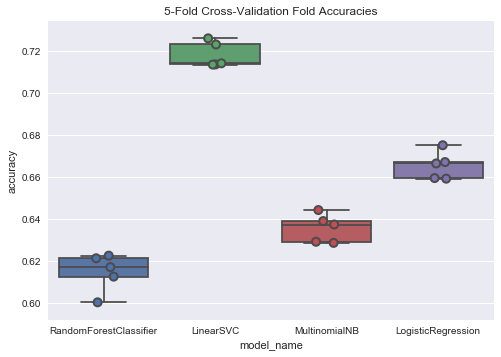

model_name
LinearSVC                 0.718196
LogisticRegression        0.665500
MultinomialNB             0.635658
RandomForestClassifier    0.614696
Name: accuracy, dtype: float64

In [27]:
features = tv_Xtrain_rfe
labels = ytrain

import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=100, max_depth=1000, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(multi_class='multinomial',solver='newton-cg',random_state=0),
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df).set_title('5-Fold Cross-Validation Fold Accuracies')
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

cv_df.groupby('model_name').accuracy.mean()

### Learning Curves

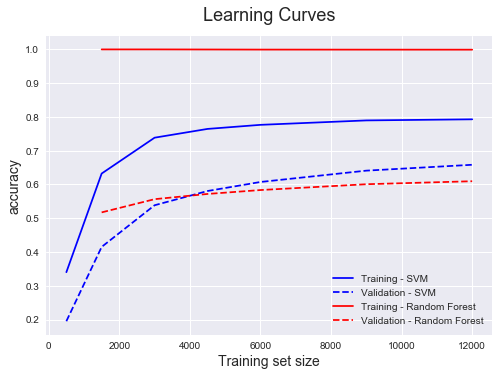

In [34]:
# Learning Curves for SVM algorithm

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
num_classes=6 

ytrainle = le.fit_transform(ytrain)


from sklearn import svm
from sklearn.model_selection import learning_curve

train_sizes = [500, 1500, 3000, 4500, 6000, 9000, 12000]
features = tv_Xtrain_rfe
target = ytrainle

train_sizes, train_scores, validation_scores = learning_curve(
estimator = svm.SVC(kernel='linear', probability=True,random_state=0),
X = features,
y = target, shuffle=True, train_sizes = train_sizes, cv = 5,scoring = 'accuracy')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean,'b-', label = 'Training - SVM')
plt.plot(train_sizes, validation_scores_mean,'b--', label = 'Validation - SVM')
plt.ylabel('accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
#plt.title('Learning curves for a SVM model', fontsize = 18, y = 1.03)
plt.legend()

# Learning Curves for Random Forest algorithm

from sklearn.ensemble import RandomForestClassifier

train_sizes = [1500, 3000, 4500, 6000, 9000, 12000]
estimator = RandomForestClassifier(n_estimators=100, max_depth=1000, random_state=0)

train_sizes, train_scores, validation_scores = learning_curve(
estimator = estimator,
X = features,
y = target, shuffle=True, train_sizes = train_sizes, cv = 5,scoring = 'accuracy')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean,'r-', label = 'Training - Random Forest')
plt.plot(train_sizes, validation_scores_mean,'r--', label = 'Validation - Random Forest')
plt.ylabel('accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
#plt.title('Learning curves for a Random Forest model', fontsize = 18, y = 1.03)
plt.title('Learning Curves', fontsize = 18, y = 1.03)
plt.legend()

### Confusion Matrices, ROC Curves and Precision-Recall Curves

Below I've generate heat maps of the confusion matrix for the support vector machine and Random Forest predictions on the RFE features test set. Receiver Operating Characteristic curves and Precision-Recall Curves follow the heat maps.

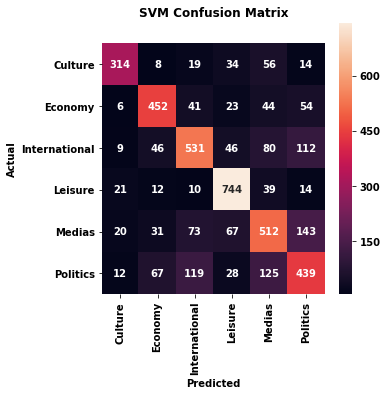

SVM Performance Metrics and Classification Report
Model Performance metrics:
------------------------------
Accuracy: 0.6855
Precision: 0.6847
Recall: 0.6855
F1 Score: 0.6841

Model Classification report:
------------------------------
               precision    recall  f1-score   support

      Economy       0.73      0.73      0.73       620
International       0.67      0.64      0.66       824
     Politics       0.57      0.56      0.56       790
       Medias       0.60      0.61      0.60       846
      Leisure       0.79      0.89      0.84       840
      Culture       0.82      0.71      0.76       445

     accuracy                           0.69      4365
    macro avg       0.70      0.69      0.69      4365
 weighted avg       0.68      0.69      0.68      4365


Prediction Confusion Matrix:
------------------------------
                      Predicted:                                              
                         Economy International Politics Medias Leisure 

In [69]:
# Support Vector Machine confusion matrix heat map
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import seaborn as sns

model = LinearSVC()

model.fit(tv_Xtrain_rfe, ytrain)
ypred = model.predict(tv_Xtest_rfe)

from sklearn.metrics import confusion_matrix

ticklabels = ['Culture', 'Economy', 'International', 'Leisure','Medias', 'Politics']

conf_mat = confusion_matrix(ytest, ypred)
fig, ax = plt.subplots(figsize=(5,5))
#sns.heatmap(conf_mat, annot=True, fmt='d',xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)
sns.heatmap(conf_mat, annot=True, fmt='d',xticklabels=ticklabels, yticklabels=ticklabels).set_title('SVM Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
b, t = plt.ylim() # discover the values for bottom and top
#b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) 
plt.show()

import model_evaluation_utils as meu

print('SVM Performance Metrics and Classification Report')
meu.display_model_performance_metrics(true_labels=ytest, predicted_labels=ypred,
                                      classes=['Economy', 'International', 'Politics', 'Medias', 'Leisure', 'Culture'])

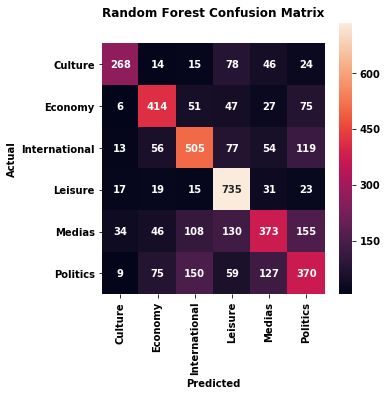

Random Forest Performance Metrics and Classification Report
Model Performance metrics:
------------------------------
Accuracy: 0.6105
Precision: 0.6088
Recall: 0.6105
F1 Score: 0.6039

Model Classification report:
------------------------------
               precision    recall  f1-score   support

      Economy       0.66      0.67      0.67       620
International       0.60      0.61      0.61       824
     Politics       0.48      0.47      0.48       790
       Medias       0.57      0.44      0.50       846
      Leisure       0.65      0.88      0.75       840
      Culture       0.77      0.60      0.68       445

     accuracy                           0.61      4365
    macro avg       0.62      0.61      0.61      4365
 weighted avg       0.61      0.61      0.60      4365


Prediction Confusion Matrix:
------------------------------
                      Predicted:                                              
                         Economy International Politics Media

In [68]:
# Random Forest Classifier confusion matrix heat map
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=1000, random_state=0)

model.fit(tv_Xtrain_rfe, ytrain)
ypred = model.predict(tv_Xtest_rfe)

from sklearn.metrics import confusion_matrix

ticklabels = ['Culture', 'Economy', 'International', 'Leisure', 'Medias','Politics']

conf_mat = confusion_matrix(ytest, ypred)
fig, ax = plt.subplots(figsize=(5,5))
#sns.heatmap(conf_mat, annot=True, fmt='d',xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)
sns.heatmap(conf_mat, annot=True, fmt='d',xticklabels=ticklabels, yticklabels=ticklabels).set_title('Random Forest Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
b, t = plt.ylim() # discover the values for bottom and top
#b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) 
plt.show()

import model_evaluation_utils as meu

print('Random Forest Performance Metrics and Classification Report')
meu.display_model_performance_metrics(true_labels=ytest, predicted_labels=ypred,
                                      classes=['Economy', 'International', 'Politics', 'Medias', 'Leisure', 'Culture'])

In [13]:
# Support Vector Machine ROC curves
# Plot ROC curves, compute areas under curves
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Binarize the output
topiclist=['Culture', 'Economy', 'International','Medias', 'Leisure', 'Politics']
ytrainbin = label_binarize(ytrain, classes=topiclist)
ytestbin = label_binarize(ytest, classes=topiclist)
n_classes = ytrainbin.shape[1]

# fit and predict
random_state = np.random.RandomState(0)
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,random_state=random_state))
y_score = classifier.fit(tv_Xtrain_rfe, ytrainbin).decision_function(tv_Xtest_rfe)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ytestbin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(ytestbin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


Support Vector Machine ROC Curves


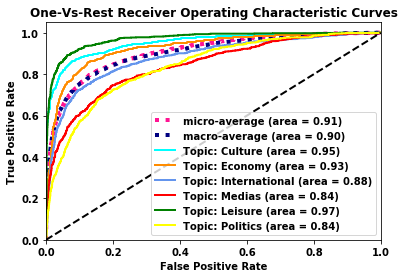

One-vs-Rest ROC AUC scores:
0.901928 (macro),
0.897477 (weighted by prevalence)


In [15]:
# Support Vector Machine ROC curves cont'd

print('Support Vector Machine ROC Curves')

#Plot ROC curves for the multilabel problem

#Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw = 2
# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],label='micro-average (area = {0:0.2f})'''.format(roc_auc["micro"]),color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],label='macro-average (area = {0:0.2f})'''.format(roc_auc["macro"]),color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red','green','yellow'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,label='Topic: {0} (area = {1:0.2f})'''.format(topiclist[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-Vs-Rest Receiver Operating Characteristic Curves')
plt.legend(loc="lower right")
plt.show()

#Area under ROC for the multiclass problem

y_prob = classifier.predict_proba(tv_Xtest_rfe)
macro_roc_auc_ovr = roc_auc_score(ytestbin, y_prob,average="macro")
weighted_roc_auc_ovr = roc_auc_score(ytestbin, y_prob,average="weighted")

print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} ""(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

Support Vector Machine Precision-Recall Curves
Average precision score, micro-averaged over all classes: 0.75


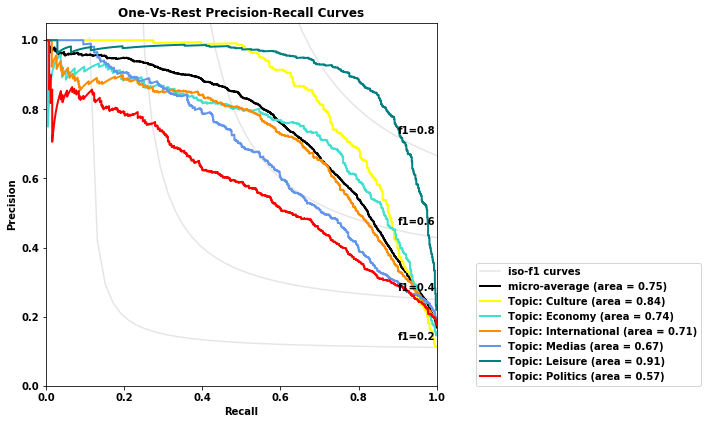

In [16]:
# Support Vector Machine Precision-Recall Curves

print('Support Vector Machine Precision-Recall Curves')

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(ytestbin[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(ytestbin[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(ytestbin.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(ytestbin, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

from itertools import cycle
# setup plot details
colors = cycle(['yellow', 'turquoise', 'darkorange', 'cornflowerblue', 'teal','red'])

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='k', lw=2)
lines.append(l)
labels.append('micro-average (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Topic: {0} (area = {1:0.2f})'
                  ''.format(topiclist[i], average_precision[i]))
    
fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('One-Vs-Rest Precision-Recall Curves')
plt.legend(lines, labels, loc=(1.1, 0), prop=dict(size=10))


plt.show()

Random Forest ROC Curves


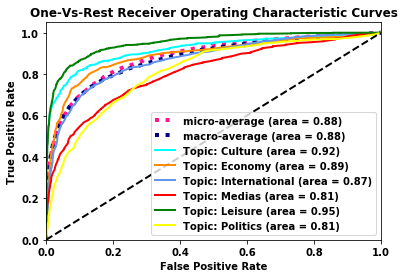

One-vs-Rest ROC AUC scores:
0.875469 (macro),
0.871910 (weighted by prevalence)


In [17]:
# Random Forest ROC curves
# fit and predict
random_state = np.random.RandomState(0)
classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, max_depth=1000, random_state=0))
y_score2 = classifier.fit(tv_Xtrain_rfe, ytrainbin).predict_proba(tv_Xtest_rfe)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ytestbin[:, i], y_score2[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(ytestbin.ravel(), y_score2.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
#Plot of a ROC curve for a specific class

print('Random Forest ROC Curves')

#Plot ROC curves for the multilabel problem

#Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],label='micro-average (area = {0:0.2f})'''.format(roc_auc["micro"]),color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],label='macro-average (area = {0:0.2f})'''.format(roc_auc["macro"]),color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red','green','yellow'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,label='Topic: {0} (area = {1:0.2f})'''.format(topiclist[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-Vs-Rest Receiver Operating Characteristic Curves')
plt.legend(loc="lower right")
plt.show()

#Area under ROC for the multiclass problem

y_prob2 = classifier.predict_proba(tv_Xtest_rfe)
macro_roc_auc_ovr = roc_auc_score(ytestbin, y_prob2,average="macro")
weighted_roc_auc_ovr = roc_auc_score(ytestbin, y_prob2,average="weighted")

print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} ""(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

Random Forest Precision-Recall Curves
Average precision score, micro-averaged over all classes: 0.71


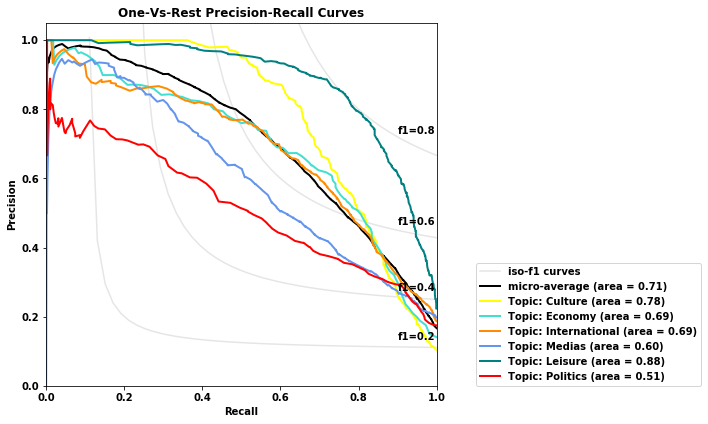

In [18]:
# Random Forest Precision-Recall curves

print('Random Forest Precision-Recall Curves')

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(ytestbin[:, i],
                                                        y_score2[:, i])
    average_precision[i] = average_precision_score(ytestbin[:, i], y_score2[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(ytestbin.ravel(),y_score2.ravel())
average_precision["micro"] = average_precision_score(ytestbin, y_score2,average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'.format(average_precision["micro"]))

from itertools import cycle
# setup plot details
colors = cycle(['yellow', 'turquoise', 'darkorange', 'cornflowerblue', 'teal','red'])

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='k', lw=2)
lines.append(l)
labels.append('micro-average (area = {0:0.2f})'''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Topic: {0} (area = {1:0.2f})'''.format(topiclist[i], average_precision[i]))
    
fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('One-Vs-Rest Precision-Recall Curves')
plt.legend(lines, labels, loc=(1.1, 0), prop=dict(size=10))


plt.show()

### Hyper-parameter Tuning

Below, I've generated learning curves for different values of maximum tree depth and number of estimators for the random forest algorithm, and different polynomial degrees for the support vector machine. It looks like the optimal maximum depth is 50 and the optimal number of estimators is 5 for the random forest algorithm. For the support vector machine, varying the polynomial degree had little impact on the learning curve. Note that in all cases it looks like there is room for improving the variance by increase the size of the dataset.

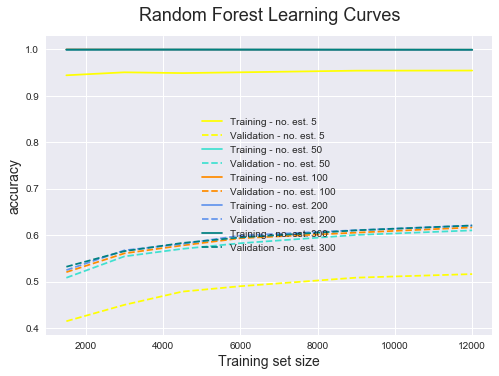

In [9]:
# Learning Curves for Random Forest algorithm

# vary n_estimators (number of trees)

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
num_classes=6 
ytrainle = le.fit_transform(ytrain)

features = tv_Xtrain_rfe
target = ytrainle

nest = [5, 50, 100, 200, 300]
colors = ['yellow', 'turquoise', 'darkorange', 'cornflowerblue', 'teal']

for i in range(len(nest)):

    color = colors[i]
    train_sizes = [1500, 3000, 4500, 6000, 9000, 12000]
    estimator = RandomForestClassifier(n_estimators=nest[i], max_depth=1000, random_state=0)
    
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator = estimator,X = features,
        y = target, shuffle=True, train_sizes = train_sizes, cv = 5,scoring = 'accuracy')
    
    train_scores_mean = train_scores.mean(axis = 1)
    validation_scores_mean = validation_scores.mean(axis = 1)
    
    plt.style.use('seaborn')
    plt.plot(train_sizes, train_scores_mean,'-', color=color, label = 'Training - no. est. {0}'''.format(nest[i]) )
    plt.plot(train_sizes, validation_scores_mean,'--', color=color,  label = 'Validation - no. est. {0}'''.format(nest[i]))

plt.ylabel('accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Random Forest Learning Curves', fontsize = 18, y = 1.03)
plt.legend()

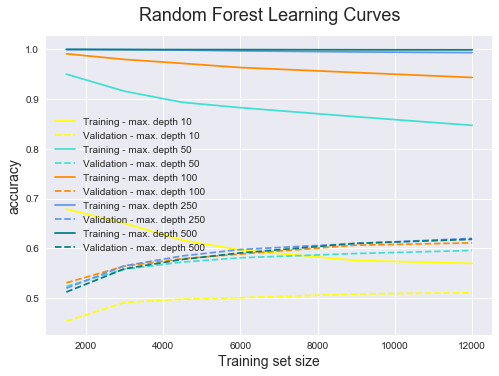

In [11]:
# Learning Curves for Random Forest algorithm

# vary max_depth (how many levels of branches)

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
num_classes=6 
ytrainle = le.fit_transform(ytrain)

features = tv_Xtrain_rfe
target = ytrainle

maxd = [10, 50, 100, 250, 500]
colors = ['yellow', 'turquoise', 'darkorange', 'cornflowerblue', 'teal','red']

for i in range(len(maxd)):

    color = colors[i]
    train_sizes = [1500, 3000, 4500, 6000, 9000, 12000]
    estimator = RandomForestClassifier(n_estimators=100, max_depth=maxd[i], random_state=0)
    
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator = estimator,X = features,
        y = target, shuffle=True, train_sizes = train_sizes, cv = 5,scoring = 'accuracy')
    
    train_scores_mean = train_scores.mean(axis = 1)
    validation_scores_mean = validation_scores.mean(axis = 1)
    
    plt.style.use('seaborn')
    plt.plot(train_sizes, train_scores_mean,'-', color=color, label = 'Training - max. depth {0}'''.format(maxd[i]) )
    plt.plot(train_sizes, validation_scores_mean,'--', color=color,  label = 'Validation - max. depth {0}'''.format(maxd[i]))

plt.ylabel('accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Random Forest Learning Curves', fontsize = 18, y = 1.03)
plt.legend()

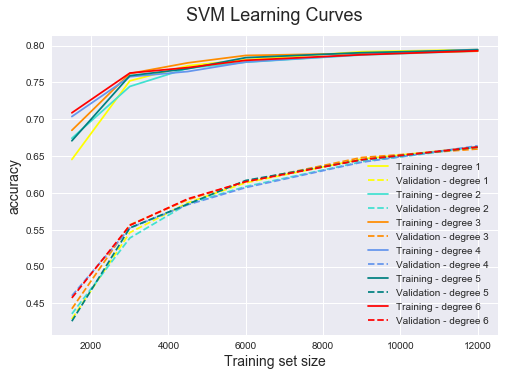

In [12]:
# Learning Curves for SVM algorithm

# vary polynomial degree

import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
num_classes=6 
ytrainle = le.fit_transform(ytrain)

features = tv_Xtrain_rfe
target = ytrainle

degrees = [1, 2, 3, 4, 5, 6]
colors = ['yellow', 'turquoise', 'darkorange', 'cornflowerblue', 'teal','red']

for i in range(len(degrees)):

    color = colors[i]
    train_sizes = [1500, 3000, 4500, 6000, 9000, 12000]
    estimator = svm.SVC(kernel='linear', probability=True,random_state=0,degree=degrees[i])
    
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator = estimator,X = features,
        y = target, shuffle=True, train_sizes = train_sizes, cv = 5,scoring = 'accuracy')
    
    train_scores_mean = train_scores.mean(axis = 1)
    validation_scores_mean = validation_scores.mean(axis = 1)
    
    plt.style.use('seaborn')
    plt.plot(train_sizes, train_scores_mean,'-', color=color, label = 'Training - degree {0}'''.format(degrees[i]) )
    plt.plot(train_sizes, validation_scores_mean,'--', color=color,  label = 'Validation - degree {0}'''.format(degrees[i]))

plt.ylabel('accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('SVM Learning Curves', fontsize = 18, y = 1.03)
plt.legend()

## Ensemble Methods

### Bagging

In [7]:
#import itertools
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec

from sklearn import datasets

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB 

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, train_test_split

np.random.seed(0)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
num_classes=6 
ytrainle = le.fit_transform(ytrain)

X = tv_Xtrain_rfe
y = ytrainle

Accuracy: 0.67 (+/- 0.01) [LR]
Accuracy: 0.65 (+/- 0.00) [Bagging LR]
Accuracy: 0.23 (+/- 0.02) [KNN]
Accuracy: 0.22 (+/- 0.01) [Bagging KNN]
Accuracy: 0.70 (+/- 0.01) [SVM]
Accuracy: 0.69 (+/- 0.01) [Bagging SVM]
Accuracy: 0.63 (+/- 0.01) [NB]
Accuracy: 0.61 (+/- 0.01) [Bagging NB]
Accuracy: 0.46 (+/- 0.01) [DT]
Accuracy: 0.55 (+/- 0.00) [Bagging DT]


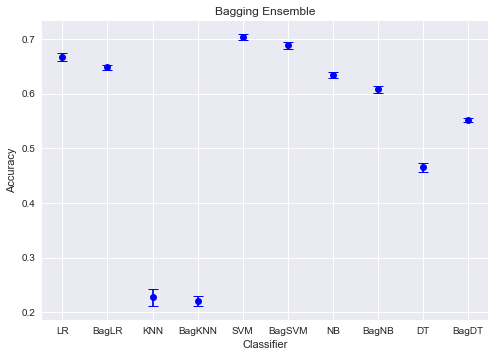

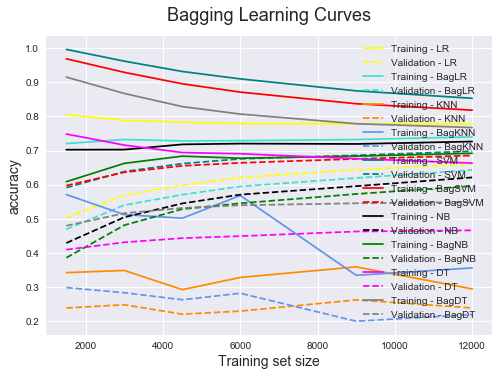

In [63]:
clf1 = LogisticRegression(solver='newton-cg',multi_class='multinomial',penalty='l2', max_iter=100, C=1)
clf2 = KNeighborsClassifier(n_neighbors=15)    
clf3 = SGDClassifier(loss='hinge', max_iter=200)
clf4 = MultinomialNB()
clf5 = DecisionTreeClassifier(max_depth=50)

nest = 20

bagging1 = BaggingClassifier(base_estimator=clf1, n_estimators=nest, max_samples=0.8, max_features=0.8)
bagging2 = BaggingClassifier(base_estimator=clf2, n_estimators=nest, max_samples=0.8, max_features=0.8)
bagging3 = BaggingClassifier(base_estimator=clf3, n_estimators=nest, max_samples=0.8, max_features=0.8)
bagging4 = BaggingClassifier(base_estimator=clf4, n_estimators=nest, max_samples=0.8, max_features=0.8)
bagging5 = BaggingClassifier(base_estimator=clf5, n_estimators=nest, max_samples=0.8, max_features=0.8)

label = ['LR', 'Bagging LR', 'KNN','Bagging KNN', 'SVM', 'Bagging SVM','NB', 'Bagging NB', 'DT', 'Bagging DT']
clf_list = [clf1, bagging1, clf2, bagging2, clf3, bagging3, clf4, bagging4, clf5, bagging5]

clf_cv_mean = []
clf_cv_std = []

for clf, label in zip(clf_list, label):
        
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
    clf_cv_mean.append(scores.mean())
    clf_cv_std.append(scores.std())
        
    clf.fit(X, y)

#plot classifier accuracy    
plt.figure()
(_, caps, _) = plt.errorbar(range(10), clf_cv_mean, yerr=clf_cv_std, c='blue', fmt='o', capsize=5)
for cap in caps:
    cap.set_markeredgewidth(1)                                                                                                                                
plt.xticks(range(10), shortlst)        
plt.ylabel('Accuracy'); plt.xlabel('Classifier'); plt.title('Bagging Ensemble');
plt.show()


# plot learning curves     
shortlst = ['LR', 'BagLR', 'KNN','BagKNN', 'SVM', 'BagSVM','NB', 'BagNB', 'DT', 'BagDT']
       

from sklearn.model_selection import learning_curve
colors = ['yellow', 'turquoise', 'darkorange', 'cornflowerblue', 'teal','red','black','green','magenta','gray']

for i in range(len(clf_list)):

    color = colors[i]
    train_sizes = [1500, 3000, 4500, 6000, 9000, 12000]
    estimator = clf_list[i]
    
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator = estimator,X = X,
        y = y, shuffle=True, train_sizes = train_sizes, cv = 5,scoring = 'accuracy')
    
    train_scores_mean = train_scores.mean(axis = 1)
    validation_scores_mean = validation_scores.mean(axis = 1)
    
    plt.style.use('seaborn')
    plt.plot(train_sizes, train_scores_mean,'-', color=color, label = 'Training - {0}'''.format(shortlst[i]) )
    plt.plot(train_sizes, validation_scores_mean,'--', color=color,  label = 'Validation - {0}'''.format(shortlst[i]))

plt.ylabel('accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Bagging Learning Curves', fontsize = 18, y = 1.03)
plt.legend()

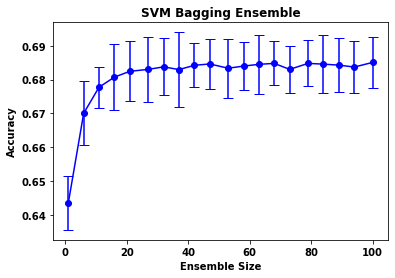

In [11]:
clf3 = SGDClassifier(loss='hinge', max_iter=200)
# try range of Ensemble Sizes on SVM
num_est = np.linspace(1,100,20).astype(int)
bg_clf_cv_mean = []
bg_clf_cv_std = []
for n_est in num_est:    
    bg_clf = BaggingClassifier(base_estimator=clf3, n_estimators=n_est, max_samples=0.8, max_features=0.8)
    scores = cross_val_score(bg_clf, X, y, cv=3, scoring='accuracy')
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())

plt.figure()
(_, caps, _) = plt.errorbar(num_est, bg_clf_cv_mean, yerr=bg_clf_cv_std, c='blue', fmt='-o', capsize=5)
for cap in caps:
    cap.set_markeredgewidth(1)                                                                                                                                
plt.ylabel('Accuracy'); plt.xlabel('Ensemble Size'); plt.title('SVM Bagging Ensemble');
plt.show()    

### Boosting

Accuracy: 0.67 (+/- 0.01) [LR]
Accuracy: 0.20 (+/- 0.00) [boosting LR]
Accuracy: 0.70 (+/- 0.00) [SVM]
Accuracy: 0.45 (+/- 0.02) [boosting SVM]
Accuracy: 0.64 (+/- 0.01) [NB]
Accuracy: 0.20 (+/- 0.00) [boosting NB]
Accuracy: 0.47 (+/- 0.01) [DT]
Accuracy: 0.50 (+/- 0.00) [boosting DT]


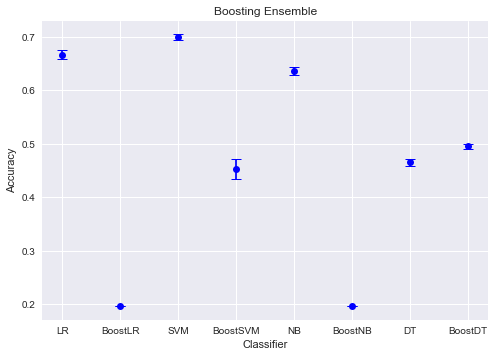

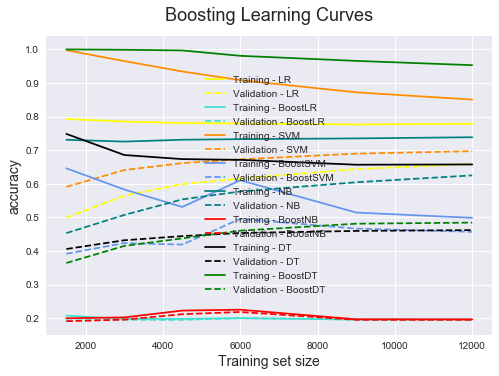

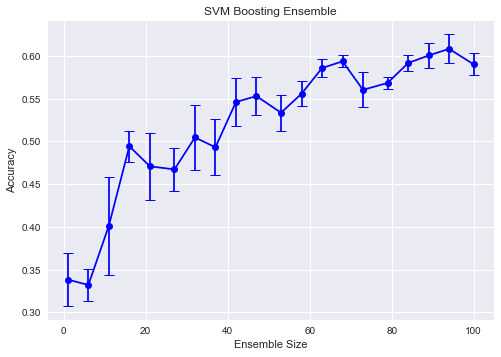

In [22]:
from sklearn.ensemble import AdaBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
        
clf1 = LogisticRegression(solver='newton-cg',multi_class='multinomial',penalty='l2', max_iter=100, C=1)
#clf2 = KNeighborsClassifier(n_neighbors=15)   # KNeighborsClassifier doesn't support sample_weight. 
clf3 = SGDClassifier(loss='hinge', max_iter=200)
clf4 = MultinomialNB()
clf5 = DecisionTreeClassifier(max_depth=50)

nest = 20

boosting1 = AdaBoostClassifier(base_estimator=clf1, n_estimators=nest,algorithm='SAMME')
#boosting2 = AdaBoostClassifier(base_estimator=clf2, n_estimators=nest,algorithm='SAMME')
boosting3 = AdaBoostClassifier(base_estimator=clf3, n_estimators=nest,algorithm='SAMME')
boosting4 = AdaBoostClassifier(base_estimator=clf4, n_estimators=nest,algorithm='SAMME')
boosting5 = AdaBoostClassifier(base_estimator=clf5, n_estimators=nest,algorithm='SAMME')

label = ['LR', 'boosting LR', 'SVM', 'boosting SVM','NB', 'boosting NB', 'DT', 'boosting DT']
clf_list = [clf1, boosting1, clf3, boosting3, clf4, boosting4, clf5, boosting5]    
shortlst = ['LR', 'BoostLR', 'SVM', 'BoostSVM','NB', 'BoostNB', 'DT', 'BoostDT']

clf_cv_mean = []
clf_cv_std = []

for clf, label in zip(clf_list, label):
        
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
    clf_cv_mean.append(scores.mean())
    clf_cv_std.append(scores.std())
        
    clf.fit(X, y)

#plot classifier accuracy    
plt.figure()
(_, caps, _) = plt.errorbar(range(8), clf_cv_mean, yerr=clf_cv_std, c='blue', fmt='o', capsize=5)
for cap in caps:
    cap.set_markeredgewidth(1)                                                                                                                                
plt.xticks(range(8), shortlst)        
plt.ylabel('Accuracy'); plt.xlabel('Classifier'); plt.title('Boosting Ensemble');
plt.show()

#plot learning curves
from sklearn.model_selection import learning_curve
colors = ['yellow', 'turquoise', 'darkorange', 'cornflowerblue', 'teal','red','black','green','magenta','gray']

for i in range(len(clf_list)):

    color = colors[i]
    train_sizes = [1500, 3000, 4500, 6000, 9000, 12000]
    estimator = clf_list[i]
    
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator = estimator,X = X,
        y = y, shuffle=True, train_sizes = train_sizes, cv = 5,scoring = 'accuracy')
    
    train_scores_mean = train_scores.mean(axis = 1)
    validation_scores_mean = validation_scores.mean(axis = 1)
    
    plt.style.use('seaborn')
    plt.plot(train_sizes, train_scores_mean,'-', color=color, label = 'Training - {0}'''.format(shortlst[i]) )
    plt.plot(train_sizes, validation_scores_mean,'--', color=color,  label = 'Validation - {0}'''.format(shortlst[i]))

plt.ylabel('accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Boosting Learning Curves', fontsize = 18, y = 1.03)
plt.legend()

# try range of Ensemble Sizes on SVM
num_est = np.linspace(1,100,20).astype(int)
bg_clf_cv_mean = []
bg_clf_cv_std = []
for n_est in num_est:    
    bg_clf = AdaBoostClassifier(base_estimator=clf3, n_estimators=n_est,algorithm='SAMME')
    scores = cross_val_score(bg_clf, X, y, cv=3, scoring='accuracy')
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())

plt.figure()
(_, caps, _) = plt.errorbar(num_est, bg_clf_cv_mean, yerr=bg_clf_cv_std, c='blue', fmt='-o', capsize=5)
for cap in caps:
    cap.set_markeredgewidth(1)                                                                                                                                
plt.ylabel('Accuracy'); plt.xlabel('Ensemble Size'); plt.title('SVM Boosting Ensemble');
plt.show()

### Stacking

In [31]:
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn import datasets

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier

from sklearn.model_selection import cross_val_score, train_test_split

from mlxtend.plotting import plot_learning_curves

In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
num_classes=6 
ytrainle = le.fit_transform(ytrain)

X = tv_Xtrain_rfe
y = ytrainle

clf1 = SGDClassifier(loss='hinge', max_iter=200)#LinearSVC()
clf2 = MultinomialNB()
clf3 = RandomForestClassifier(n_estimators=100, max_depth=1000, random_state=0)

metaclf = LogisticRegression(solver='newton-cg',multi_class='multinomial',penalty='l2', max_iter=100, C=1)

sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], meta_classifier=metaclf)


Accuracy: 0.70 (+/- 0.01) [Support Vector Machine]
Accuracy: 0.63 (+/- 0.01) [Naive Bayes]
Accuracy: 0.62 (+/- 0.01) [Random Forest]
Accuracy: 0.62 (+/- 0.01) [Stacking Classifier (LR)]


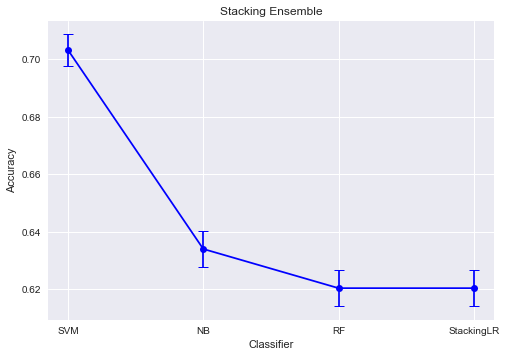

In [46]:
label = ['Support Vector Machine', 'Naive Bayes', 'Random Forest', 'Stacking Classifier (LR)']
shortlst = ['SVM', 'NB', 'RF', 'StackingLR']
clf_list = [clf1, clf2, clf3, sclf]
    
clf_cv_mean = []
clf_cv_std = []

for clf, label in zip(clf_list, label):
        
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
    clf_cv_mean.append(scores.mean())
    clf_cv_std.append(scores.std())
        
    clf.fit(X, y)
    
#plot classifier accuracy    
plt.figure()
(_, caps, _) = plt.errorbar(range(4), clf_cv_mean, yerr=clf_cv_std, c='blue', fmt='o', capsize=5)
for cap in caps:
    cap.set_markeredgewidth(1)                                                                                                                                
plt.xticks(range(4), shortlst)        
plt.ylabel('Accuracy'); plt.xlabel('Classifier'); plt.title('Stacking Ensemble');
plt.show()


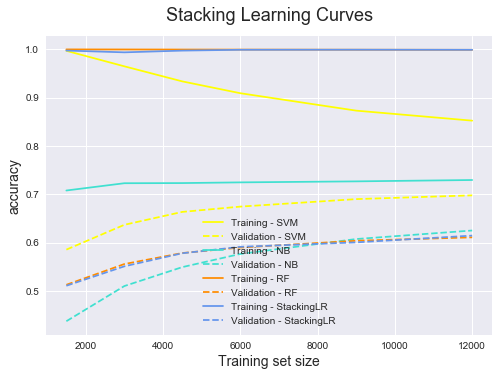

In [47]:
from sklearn.model_selection import learning_curve
colors = ['yellow', 'turquoise', 'darkorange', 'cornflowerblue']

for i in range(len(clf_list)):

    color = colors[i]
    train_sizes = [1500, 3000, 4500, 6000, 9000, 12000]
    estimator = clf_list[i]
    
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator = estimator,X = X,
        y = y, shuffle=True, train_sizes = train_sizes, cv = 5,scoring = 'accuracy')
    
    train_scores_mean = train_scores.mean(axis = 1)
    validation_scores_mean = validation_scores.mean(axis = 1)
    
    plt.style.use('seaborn')
    plt.plot(train_sizes, train_scores_mean,'-', color=color, label = 'Training - {0}'''.format(shortlst[i]) )
    plt.plot(train_sizes, validation_scores_mean,'--', color=color,  label = 'Validation - {0}'''.format(shortlst[i]))

plt.ylabel('accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Stacking Learning Curves', fontsize = 18, y = 1.03)
plt.legend()

## Neural Networks

### Multilayer perceptron

In [5]:
# in order to run this locally in a timely manner
# reduce number of RFE-selected features from 10000 to 5000
numrfef = 5000

from sklearn.linear_model import SGDClassifier # stochastic gradient descent optimizer, default support vector machine
from sklearn.feature_selection import RFE
svm = SGDClassifier(loss='hinge', max_iter=200)
# selected features
selector = RFE(svm, numrfef , step=0.1)
selector = selector.fit(tv_Xtrain, ytrain)
tv_Xtrain_rfe = tv_Xtrain[:,selector.support_]
tv_Xtest_rfe = tv_Xtest[:,selector.support_]
    
svm.fit(tv_Xtrain_rfe, ytrain)
print('SVM Classification accuracy using {:0} RFE features (baseline): {:.3f}' .format(numrfef,svm.score(tv_Xtest_rfe, ytest)))
print('\n')


SVM Classification accuracy using 5000 RFE features (baseline): 0.678




In [24]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

max_words = numrfef

le = LabelEncoder()
num_classes=6 
ytrainle = le.fit_transform(ytrain)
ytestle = le.fit_transform(ytest)

x_train = tv_Xtrain_rfe
Ytrain = ytrainle

x_test = tv_Xtest_rfe
Ytest = ytestle

y_train = utils.to_categorical(Ytrain, num_classes)
y_test = utils.to_categorical(Ytest, num_classes)

batch_size = 64
epochs = 15

# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

history = model.fit(x_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_split=0.1)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               2560512   
_________________________________________________________________
activation_3 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 3078      
_________________________________________________________________
activation_4 (Activation)    (None, 6)                 0         
Total params: 2,563,590
Trainable params: 2,563,590
Non-trainable params: 0
_________________________________________________________________
Train on 15713 samples, validate on 1746 samples
Epoch 1/15
15713/15713 [==============================] - 20s 1ms/step - loss: 1.34

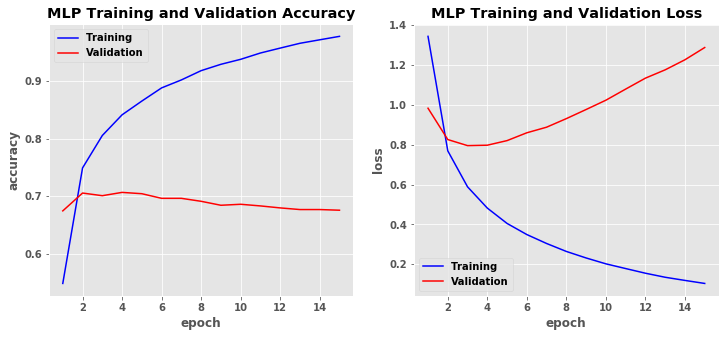

In [19]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training')
    plt.plot(x, val_acc, 'r', label='Validation')
    plt.title('MLP Training and Validation Accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training')
    plt.plot(x, val_loss, 'r', label='Validation')
    plt.title('MLP Training and Validation Loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    
plot_history(history)

4365/4365 [==============================] - 2s 393us/step
Test accuracy: 0.626345933630704


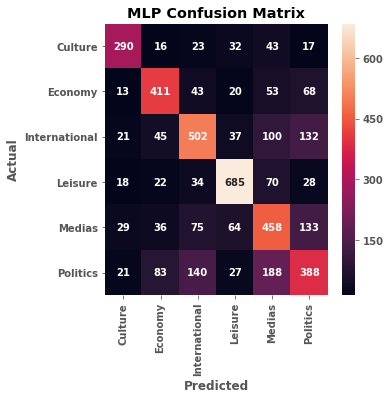

MLP Performance Metrics and Classification Report
Model Performance metrics:
------------------------------
Accuracy: 0.6263
Precision: 0.6278
Recall: 0.6263
F1 Score: 0.6263

Model Classification report:
------------------------------
               precision    recall  f1-score   support

International       0.61      0.60      0.61       837
     Politics       0.51      0.46      0.48       847
      Economy       0.67      0.68      0.67       608
       Medias       0.50      0.58      0.54       795
      Leisure       0.79      0.80      0.80       857
      Culture       0.74      0.69      0.71       421

     accuracy                           0.63      4365
    macro avg       0.64      0.63      0.63      4365
 weighted avg       0.63      0.63      0.63      4365


Prediction Confusion Matrix:
------------------------------
                         Predicted:                                        
                      International Politics Economy Medias Leisure Cultur

In [21]:
score = model.evaluate(x_test, y_test,batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])
y_pred = model.predict(x_test, batch_size=batch_size)


from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

predictions = le.inverse_transform(y_pred.argmax(axis=1)) 

ticklabels = ['Culture', 'Economy', 'International', 'Leisure','Medias', 'Politics']

conf_mat = confusion_matrix(ytest, predictions)
fig, ax = plt.subplots(figsize=(5,5))
#sns.heatmap(conf_mat, annot=True, fmt='d',xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)
sns.heatmap(conf_mat, annot=True, fmt='d',xticklabels=ticklabels, yticklabels=ticklabels).set_title('MLP Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

import model_evaluation_utils as meu

print('MLP Performance Metrics and Classification Report')

meu.display_model_performance_metrics(true_labels=ytest, predicted_labels=predictions,
                                      classes=[ 'International', 'Politics', 'Economy','Medias', 'Leisure', 'Culture'])

### Recurrent Neural Network

In [28]:
# in order to run this locally in a timely manner
# reduce number of RFE-selected features from 10000 to 1000
numrfef = 1000

from sklearn.linear_model import SGDClassifier # stochastic gradient descent optimizer, default support vector machine
from sklearn.feature_selection import RFE
svm = SGDClassifier(loss='hinge', max_iter=200)
# selected features
selector = RFE(svm, numrfef , step=0.1)
selector = selector.fit(tv_Xtrain, ytrain)
tv_Xtrain_rfe = tv_Xtrain[:,selector.support_]
tv_Xtest_rfe = tv_Xtest[:,selector.support_]
    
svm.fit(tv_Xtrain_rfe, ytrain)
print('SVM Classification accuracy using {:0} RFE features (baseline): {:.3f}' .format(numrfef,svm.score(tv_Xtest_rfe, ytest)))
print('\n')

from sklearn.preprocessing import LabelEncoder
from keras import utils

le = LabelEncoder()
num_classes=6 
ytrainle = le.fit_transform(ytrain)
ytestle = le.fit_transform(ytest)

x_train = tv_Xtrain_rfe
Ytrain = ytrainle

x_test = tv_Xtest_rfe
Ytest = ytestle

y_train = utils.to_categorical(Ytrain, num_classes)
y_test = utils.to_categorical(Ytest, num_classes)


SVM Classification accuracy using 1000 RFE features (baseline): 0.646




In [29]:
import numpy

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)

top_words = numrfef

max_review_length = numrfef

# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

batch_size = 64
epochs = 15

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.1)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 1000, 32)          32000     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 606       
Total params: 85,806
Trainable params: 85,806
Non-trainable params: 0
_________________________________________________________________
None
Train on 15713 samples, validate on 1746 samples
Epoch 1/15
15713/15713 [==============================] - 427s 27ms/step - loss: 1.7715 - acc: 0.1952 - val_loss: 1.7745 - val_acc: 0.1781
Epoch 2/15
15713/15713 [==============================] - 431s 27ms/step - loss: 1.7699 - acc: 0.1930 - val_loss: 1.7741 - val_acc: 0.2027
Epoch 3/15
15713/15713 [==============================] - 441s 28ms/st

4365/4365 [==============================] - 31s 7ms/step
Test accuracy: 0.18213058420097433


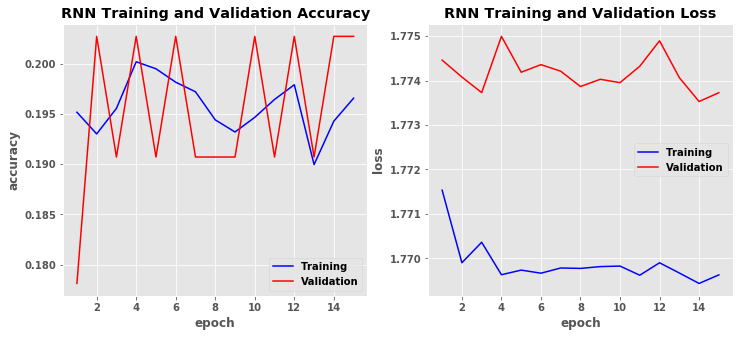

In [30]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training')
    plt.plot(x, val_acc, 'r', label='Validation')
    plt.title('RNN Training and Validation Accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training')
    plt.plot(x, val_loss, 'r', label='Validation')
    plt.title('RNN Training and Validation Loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    
plot_history(history)

score = model.evaluate(x_test, y_test,batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])

### Convolutional Neural Network

In [33]:
# in order to run this locally in a timely manner
# reduce number of RFE-selected features from 10000 to 1000
numrfef = 1000

from sklearn.linear_model import SGDClassifier # stochastic gradient descent optimizer, default support vector machine
from sklearn.feature_selection import RFE
svm = SGDClassifier(loss='hinge', max_iter=200)
# selected features
selector = RFE(svm, numrfef , step=0.1)
selector = selector.fit(tv_Xtrain, ytrain)
tv_Xtrain_rfe = tv_Xtrain[:,selector.support_]
tv_Xtest_rfe = tv_Xtest[:,selector.support_]
    
svm.fit(tv_Xtrain_rfe, ytrain)
print('SVM Classification accuracy using {:0} RFE features (baseline): {:.3f}' .format(numrfef,svm.score(tv_Xtest_rfe, ytest)))
print('\n')

from sklearn.preprocessing import LabelEncoder
from keras import utils

le = LabelEncoder()
num_classes=6 
ytrainle = le.fit_transform(ytrain)
ytestle = le.fit_transform(ytest)

x_train = tv_Xtrain_rfe
Ytrain = ytrainle

x_test = tv_Xtest_rfe
Ytest = ytestle

y_train = utils.to_categorical(Ytrain, num_classes)
y_test = utils.to_categorical(Ytest, num_classes)


SVM Classification accuracy using 1000 RFE features (baseline): 0.648




In [35]:
from keras.models import Sequential
from keras import layers

top_words = numrfef
max_review_length = numrfef

# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(layers.Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(num_classes, activation='sigmoid'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

batch_size = 64
epochs = 15

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 1000, 32)          32000     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 996, 128)          20608     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1290      
_________________________________________________________________
dense_15 (Dense)             (None, 6)                 66        
Total params: 53,964
Trainable params: 53,964
Non-trainable params: 0
_________________________________________________________________
Train on 15713 samples, validate on 1746 samples
Epoch 1/15
15713/15713 [==============================] - 141s 9ms/step - loss: 1.7773 - 

4365/4365 [==============================] - 10s 2ms/step
Test accuracy: 0.18258877434988613


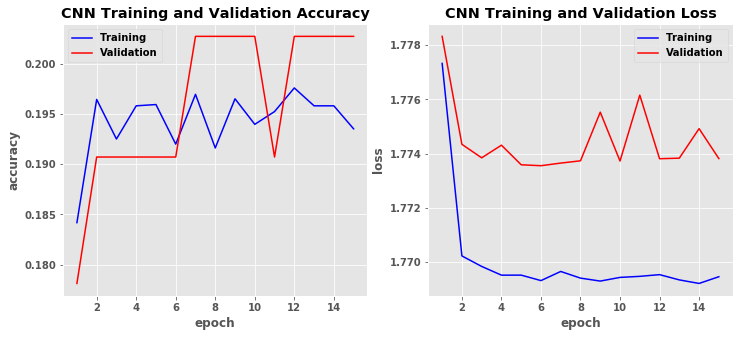

In [36]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training')
    plt.plot(x, val_acc, 'r', label='Validation')
    plt.title('CNN Training and Validation Accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training')
    plt.plot(x, val_loss, 'r', label='Validation')
    plt.title('CNN Training and Validation Loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    
plot_history(history)

score = model.evaluate(x_test, y_test,batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])

## Model Interpretation

### LIME - Locally Interpretable Model-Agnostic Explanations

For interpretation with LIME I've used the support vector machine algorithm.

From the LIME plot below we can say that for the single sample shown the words **expel**, **Britain**, and **Trump** contributed to a LIME topic prediction of **Economy** which was correct, while the SVM prediction was **International** which was LIME's second choice.

In [1]:
# bring back the saved preprocessed dataframe
# load pre-processed data that was saved in previous section
from IPython import get_ipython
get_ipython().magic('reset -sf')

import pandas as pd

df = pd.read_csv('preprocessed_data.csv', low_memory=False)
df.head()
# eliminate empty rows that weren't caught in the pre-processing section 
print(df.isna().sum())
df = df.dropna(subset = ['comment']) 
print(df.isna().sum())

comment    10
topic       0
dtype: int64
comment    0
topic      0
dtype: int64


In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import lime
from lime import lime_text
from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import make_pipeline


list_corpus = df["comment"].tolist()
list_labels = df["topic"].tolist()
Xtrain, Xtest, ytrain, ytest = train_test_split(list_corpus, list_labels, test_size=0.2, random_state=40)

le = LabelEncoder()
num_classes=6 
ytrainle = le.fit_transform(ytrain)
ytestle = le.fit_transform(ytest)

vectorizer = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0, ngram_range=(1,2),sublinear_tf=True)
tv_Xtrain = vectorizer.fit_transform(Xtrain)
tv_Xtest = vectorizer.transform(Xtest)

#vectorizer._validate_vocabulary()
#algo = LogisticRegression(solver='newton-cg',multi_class='multinomial',penalty='l2', max_iter=100, C=1)
algo = SGDClassifier(loss='modified_huber', max_iter=200)

c = make_pipeline(vectorizer, algo)
c.fit(Xtrain, ytrain)
pred = c.predict(Xtest)

class_names=list(df.topic.unique())
explainer = LimeTextExplainer(class_names=class_names)

In [3]:
idx = 3818
#from random import randint
#idx = randint(0,4364)


exp = explainer.explain_instance(Xtest[idx], c.predict_proba, num_features=20, labels=[0,1,2,3,4,5])
print('Comment id: %d' % idx)
print('Comment (cleaned): ', Xtest[idx])
#print('Predicted class =', class_names[logreg.predict(tv_Xtest[idx]).reshape(1,-1)[0,0]])
print('Predicted Topic: ', pred[idx])
print('True Topic: %s' % class_names[ytestle[idx]])
exp = explainer.explain_instance(Xtest[idx], c.predict_proba, num_features=6, top_labels=6)
print('\n')
print('LIME ordering:')
print(exp.available_labels()[0] , class_names[exp.available_labels()[0]])
print(exp.available_labels()[1] , class_names[exp.available_labels()[1]])
print(exp.available_labels()[2] , class_names[exp.available_labels()[2]])
print(exp.available_labels()[3] , class_names[exp.available_labels()[3]])
print(exp.available_labels()[4] , class_names[exp.available_labels()[4]])
print(exp.available_labels()[5] , class_names[exp.available_labels()[5]])

Comment id: 3818
Comment (cleaned):  much aggressive move Trump expect Britain expel expel Interesting
Predicted Topic:  International
True Topic: Economy


LIME ordering:
2 Economy
1 International
3 Politics
5 Medias
4 Culture
0 Leisure


In [4]:
print ('Explanation for class %s' % class_names[exp.available_labels()[0]])
print ('\n'.join(map(str, exp.as_list(label=exp.available_labels()[0]))))
print ('\n')
print ('Explanation for class %s' % class_names[exp.available_labels()[1]])
print ('\n'.join(map(str, exp.as_list(label=exp.available_labels()[1]))))
print ('\n')
print ('Explanation for class %s' % class_names[exp.available_labels()[2]])
print ('\n'.join(map(str, exp.as_list(label=exp.available_labels()[2]))))
print ('\n')
print ('Explanation for class %s' % class_names[exp.available_labels()[3]])
print ('\n'.join(map(str, exp.as_list(label=exp.available_labels()[3]))))
print ('\n')
print ('Explanation for class %s' % class_names[exp.available_labels()[4]])
print ('\n'.join(map(str, exp.as_list(label=exp.available_labels()[4]))))
print ('\n')
print ('Explanation for class %s' % class_names[exp.available_labels()[5]])
print ('\n'.join(map(str, exp.as_list(label=exp.available_labels()[5]))))
print ('\n')

Explanation for class Economy
('expel', 0.39449607997689384)
('Britain', 0.1934087856222036)
('move', -0.1181103693474836)
('Trump', 0.09738318206531946)
('much', -0.07352262788571687)
('aggressive', -0.04437759170159558)


Explanation for class International
('expel', -0.13939776014077582)
('move', 0.11279604868018615)
('much', 0.03359232555749378)
('Trump', 0.03295176454994684)
('Britain', 0.02944880931314703)
('aggressive', -0.010771672762005413)


Explanation for class Politics
('Trump', -0.17853076318572847)
('aggressive', 0.06722392475161329)
('Britain', -0.055719311028035456)
('much', 0.04550206236516647)
('expect', -0.035572106063109114)
('move', 0.031723673593890694)


Explanation for class Medias
('expel', -0.16690117809199978)
('Britain', -0.1257754760013383)
('Trump', 0.12500645723075077)
('Interesting', -0.015239628725880902)
('much', -0.011821292171143074)
('move', -0.006273513141761104)


Explanation for class Culture
('expel', -0.04629522004911401)
('Trump', -0.02582342

In [8]:
exp.show_in_notebook(text=False)

### SHAP - Shapley Additive Explanations

For interpretation with SHAP I've used a multilayer perceptron algorithm.

From the SHAP plot below we can say that:

- the word **trump** has the most impact on the accuracy of a **Politics** topic prediction, and the least impact on a **Medias** or **Culture** prediction  
- the word **trade** has the most impact on a **Economy** prediction  
- the words **putin** and **attack** have the most impact on a **International** prediction  
- the word **vote** has the most impact on a **Medias** prediction  
- the tokens **met** and **levine** have the most impact on a **Culture** prediction  
- the word **house** has arguably the most impact on a **Leisure** prediction  


In [52]:
# bring back the saved preprocessed dataframe
# load pre-processed data that was saved in previous section
from IPython import get_ipython
get_ipython().magic('reset -sf')

import pandas as pd

df = pd.read_csv('preprocessed_data.csv', low_memory=False)
df.head()
# eliminate empty rows that weren't caught in the pre-processing section 
print(df.isna().sum())
df = df.dropna(subset = ['comment']) 
print(df.isna().sum())

from sklearn.model_selection import train_test_split
list_corpus = df["comment"].tolist()
list_labels = df["topic"].tolist()
Xtrain, Xtest, ytrain, ytest = train_test_split(list_corpus, list_labels, test_size=0.2, random_state=40)

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from keras import utils


le = LabelEncoder()
num_classes=6 
ytrainle = le.fit_transform(ytrain)
ytestle = le.fit_transform(ytest)
y_train = utils.to_categorical(ytrainle, num_classes)
y_test = utils.to_categorical(ytestle, num_classes)





comment    10
topic       0
dtype: int64
comment    0
topic      0
dtype: int64


In [53]:
from sklearn.preprocessing import MultiLabelBinarizer
import tensorflow as tf
from tensorflow.keras.preprocessing import text
import keras.backend.tensorflow_backend as K
K.set_session
import shap


class TextPreprocessor(object):
    def __init__(self, vocab_size):
        self._vocab_size = vocab_size
        self._tokenizer = None
    def create_tokenizer(self, text_list):
        tokenizer = text.Tokenizer(num_words = self._vocab_size)
        tokenizer.fit_on_texts(text_list)
        self._tokenizer = tokenizer
    def transform_text(self, text_list):
        text_matrix = self._tokenizer.texts_to_matrix(text_list)
        return text_matrix
     
VOCAB_SIZE = 500

processor = TextPreprocessor(VOCAB_SIZE)
processor.create_tokenizer(Xtrain)
X_train = processor.transform_text(Xtrain)
X_test = processor.transform_text(Xtest)

def create_model(vocab_size, num_tags):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(50, input_shape = (VOCAB_SIZE,), activation='relu'))
    model.add(tf.keras.layers.Dense(25, activation='relu'))
    model.add(tf.keras.layers.Dense(num_tags, activation='sigmoid'))
    model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
    return model
model = create_model(VOCAB_SIZE, num_classes)
model.fit(X_train, y_train, epochs = 2, batch_size=128, validation_split=0.1)
print('Eval loss/accuracy:{}'.format(model.evaluate(X_test, y_test, batch_size = 128)))

Train on 15713 samples, validate on 1746 samples
Epoch 1/2
15713/15713 [==============================] - 2s 117us/sample - loss: 1.6559 - acc: 0.3247 - val_loss: 1.4086 - val_acc: 0.4347
Epoch 2/2
4365/4365 [==============================] - 0s 32us/sample - loss: 1.2336 - acc: 0.5359
Eval loss/accuracy:[1.2335662279478599, 0.5358534]


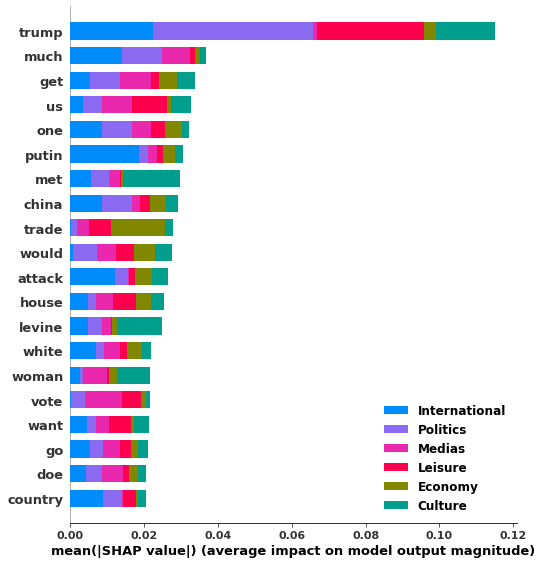

In [55]:
attrib_data = X_train[:200]

explainer = shap.DeepExplainer(model, attrib_data)

num_explanations = 20

shap_vals = explainer.shap_values(X_test[:num_explanations])

words = processor._tokenizer.word_index

word_lookup = list()

for i in words.keys():
    word_lookup.append(i)
    
word_lookup = [''] + word_lookup
shap.summary_plot(shap_vals, feature_names=word_lookup, class_names=le.classes_)

## Conclusions

- **Leisure** topic is predicted most accurately  
- **Politics** topic is predicted least accurately  
- **Support Vector Machine** did best  
- **TF-IDF features** did best  

## References

Llewellyn, C., Grover, C. and Oberlander, J. (2016) <a href="https://www.aclweb.org/anthology/P16-3007/" target="_blank"> Improving Topic Model Clustering of Newspaper Comments for Summarisation</a>. Proceedings of the 54th Annual Meeting of the Association for Computational Linguistics – Student Research Workshop, pages 43–50,Berlin, Germany, August 7-12, 2016.

Shaikh, Javed (2017) <a href="https://towardsdatascience.com/machine-learning-nlp-text-classification-using-scikit-learn-python-and-nltk-c52b92a7c73a" target="_blank"> Machine Learning, NLP: Text Classification using scikit-learn, python and NLTK</a>. Towards Data Science